In [1]:
import re
import glob

def list_sort_nicely(l):
    def convert(text): return int(text) if text.isdigit() else text
    def alphanum_key(key): return [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

# cell segmentation 모든 cell gt 만들기

In [7]:
import os
import pandas as pd
root = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2'
gt_cells = pd.read_csv(list_sort_nicely(glob.glob(os.path.join(root, f'annotations/train/cell_csv/*.csv')))[0], header=None)
gt_cells.columns = ['x', 'y', 'class']

In [9]:
len(gt_cells[gt_cells['class']==1].values)

0

In [10]:
len(gt_cells[gt_cells['class']==2].values)

128

In [12]:
import torch
p1 = torch.tensor(len(gt_cells[gt_cells['class']==1].values)).float() 
p2 = torch.tensor(len(gt_cells[gt_cells['class']==2].values)).float() 

In [13]:
point = torch.stack([p1, p2], dim=0)

In [17]:
point = torch.stack([torch.tensor(0.0), torch.tensor(0.0)], dim=0)

In [19]:
point

tensor([0., 0.])

In [18]:
point.shape

torch.Size([2])

/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/images/train/cell/021.jpg
/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/train/cell_seg/021.png


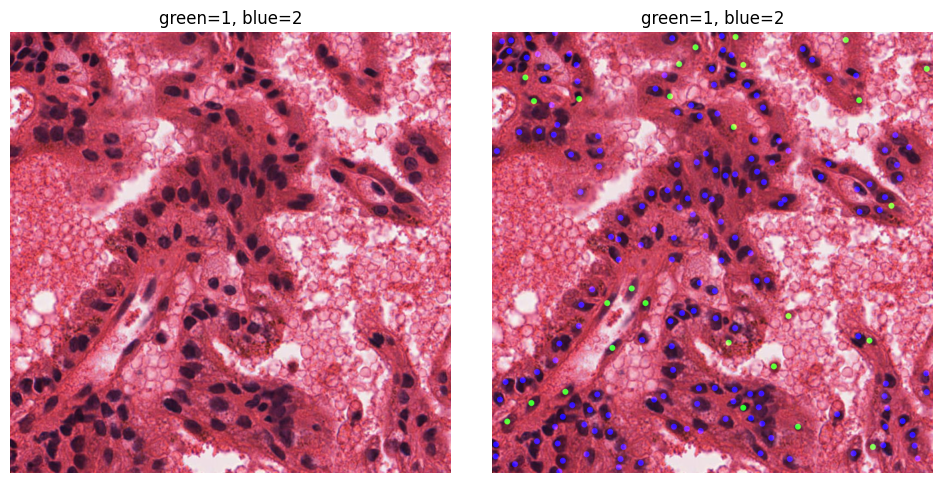


/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/images/train/cell/022.jpg
/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/train/cell_seg/022.png


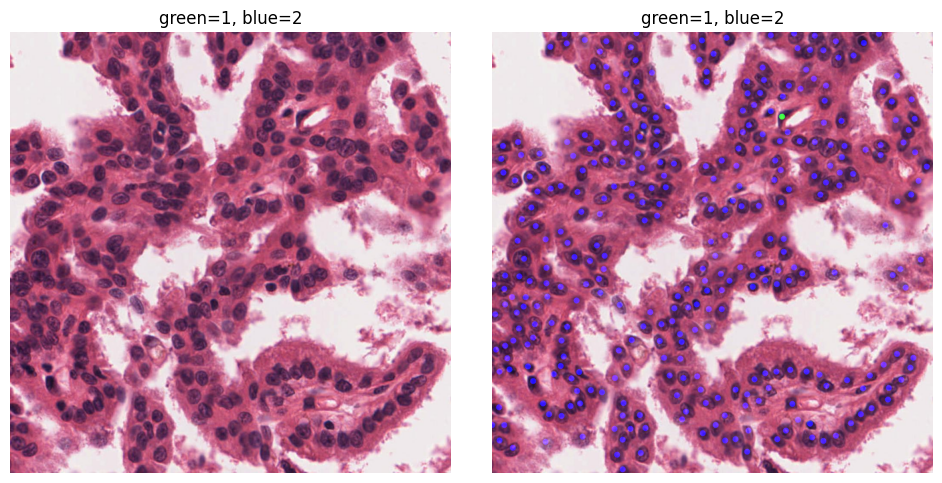

In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

ocelot2023_cell      = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/images/train/cell/*.jpg'))
ocelot2023_cell_gt   = list_sort_nicely(glob.glob('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/dataset/ocelot2023_v0.1.2/annotations/train/cell_seg/*.png'))


for i in range(20, 22):
    
    print(ocelot2023_cell[i])
    print(ocelot2023_cell_gt[i])

    cell = cv2.imread(ocelot2023_cell[i], cv2.IMREAD_COLOR)
    cell = cv2.cvtColor(cell, cv2.COLOR_BGR2RGB)    

    cell_gt = cv2.imread(ocelot2023_cell_gt[i], cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.tight_layout()
    plt.axis('off')
    plt.title('green=1, blue=2')
    plt.imshow(cell)
    
    plt.subplot(122)
    cell[..., 1][cell_gt==1] = 255
    cell[..., 2][cell_gt==2] = 255
    plt.axis('off')
    plt.title('green=1, blue=2')    
    plt.imshow(cell)
    
    plt.show()
    
    print("=================================================")
    print("")
    # cv2.imwrite(ocelot2023_tissue_gt[i].replace('/tissue', '/tissue_cropped'), img)

    


In [ ]:
cell = cv2.imread(ocelot2023_cell[i], cv2.IMREAD_COLOR)
cell = cv2.cvtColor(cell, cv2.COLOR_BGR2RGB)




In [3]:
import timm
encoder = timm.create_model('maxvit_xlarge_tf_512.in21k_ft_in1k', pretrained=True, features_only=False) # Xlarge

In [4]:
encoder

MaxxVit(
  (stem): Stem(
    (conv1): Conv2dSame(3, 192, kernel_size=(3, 3), stride=(2, 2))
    (norm1): BatchNormAct2d(
      192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): GELUTanh()
    )
    (conv2): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (stages): Sequential(
    (0): MaxxVitStage(
      (blocks): Sequential(
        (0): MaxxVitBlock(
          (conv): MbConvBlock(
            (shortcut): Downsample2d(
              (pool): AvgPool2dSame(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
              (expand): Identity()
            )
            (pre_norm): BatchNormAct2d(
              192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
              (drop): Identity()
              (act): Identity()
            )
            (down): Identity()
            (conv1_1x1): Conv2d(192, 768, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (norm1): BatchNormAct2d(


In [2]:
import torch
checkpoint      = torch.load('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230801_Cell_MaxViT_UNet_MTL_Cross_Conv_Point_Xlarge_CLAHE_Focal/epoch_105_checkpoint.pth')

In [3]:
checkpoint['model_state_dict'].keys()

odict_keys(['encoder.stem.conv1.weight', 'encoder.stem.conv1.bias', 'encoder.stem.norm1.weight', 'encoder.stem.norm1.bias', 'encoder.stem.norm1.running_mean', 'encoder.stem.norm1.running_var', 'encoder.stem.norm1.num_batches_tracked', 'encoder.stem.conv2.weight', 'encoder.stem.conv2.bias', 'encoder.stages_0.blocks.0.conv.pre_norm.weight', 'encoder.stages_0.blocks.0.conv.pre_norm.bias', 'encoder.stages_0.blocks.0.conv.pre_norm.running_mean', 'encoder.stages_0.blocks.0.conv.pre_norm.running_var', 'encoder.stages_0.blocks.0.conv.pre_norm.num_batches_tracked', 'encoder.stages_0.blocks.0.conv.conv1_1x1.weight', 'encoder.stages_0.blocks.0.conv.norm1.weight', 'encoder.stages_0.blocks.0.conv.norm1.bias', 'encoder.stages_0.blocks.0.conv.norm1.running_mean', 'encoder.stages_0.blocks.0.conv.norm1.running_var', 'encoder.stages_0.blocks.0.conv.norm1.num_batches_tracked', 'encoder.stages_0.blocks.0.conv.conv2_kxk.weight', 'encoder.stages_0.blocks.0.conv.norm2.weight', 'encoder.stages_0.blocks.0.conv

# model 설계

In [3]:
from transformers import SegformerForSemanticSegmentation

# c_model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b4-finetuned-ade-512-512")

In [10]:
c_model.segformer.encoder.patch_embeddings[0].proj = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3), bias=True)

Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))

In [12]:
c_model.segformer.encoder.patch_embeddings[0].proj.weight.shape

torch.Size([64, 3, 7, 7])

In [13]:
c_model.segformer.encoder.patch_embeddings[0].proj.bias.shape

torch.Size([64])

In [4]:
import torch
t_model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b4-finetuned-ade-512-512")
t_model.decode_head.classifier = torch.nn.Conv2d(768, 1, kernel_size=(1, 1), stride=(1, 1), bias=True)

In [5]:
checkpoint  = torch.load('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230720_Tissue_Segformer_Segmap_Save_Cancer/epoch_204_checkpoint.pth')
t_model.load_state_dict(checkpoint['model_state_dict'])

RuntimeError: Error(s) in loading state_dict for SegformerForSemanticSegmentation:
	Missing key(s) in state_dict: "segformer.encoder.patch_embeddings.0.proj.weight", "segformer.encoder.patch_embeddings.0.proj.bias", "segformer.encoder.patch_embeddings.0.layer_norm.weight", "segformer.encoder.patch_embeddings.0.layer_norm.bias", "segformer.encoder.patch_embeddings.1.proj.weight", "segformer.encoder.patch_embeddings.1.proj.bias", "segformer.encoder.patch_embeddings.1.layer_norm.weight", "segformer.encoder.patch_embeddings.1.layer_norm.bias", "segformer.encoder.patch_embeddings.2.proj.weight", "segformer.encoder.patch_embeddings.2.proj.bias", "segformer.encoder.patch_embeddings.2.layer_norm.weight", "segformer.encoder.patch_embeddings.2.layer_norm.bias", "segformer.encoder.patch_embeddings.3.proj.weight", "segformer.encoder.patch_embeddings.3.proj.bias", "segformer.encoder.patch_embeddings.3.layer_norm.weight", "segformer.encoder.patch_embeddings.3.layer_norm.bias", "segformer.encoder.block.0.0.layer_norm_1.weight", "segformer.encoder.block.0.0.layer_norm_1.bias", "segformer.encoder.block.0.0.attention.self.query.weight", "segformer.encoder.block.0.0.attention.self.query.bias", "segformer.encoder.block.0.0.attention.self.key.weight", "segformer.encoder.block.0.0.attention.self.key.bias", "segformer.encoder.block.0.0.attention.self.value.weight", "segformer.encoder.block.0.0.attention.self.value.bias", "segformer.encoder.block.0.0.attention.self.sr.weight", "segformer.encoder.block.0.0.attention.self.sr.bias", "segformer.encoder.block.0.0.attention.self.layer_norm.weight", "segformer.encoder.block.0.0.attention.self.layer_norm.bias", "segformer.encoder.block.0.0.attention.output.dense.weight", "segformer.encoder.block.0.0.attention.output.dense.bias", "segformer.encoder.block.0.0.layer_norm_2.weight", "segformer.encoder.block.0.0.layer_norm_2.bias", "segformer.encoder.block.0.0.mlp.dense1.weight", "segformer.encoder.block.0.0.mlp.dense1.bias", "segformer.encoder.block.0.0.mlp.dwconv.dwconv.weight", "segformer.encoder.block.0.0.mlp.dwconv.dwconv.bias", "segformer.encoder.block.0.0.mlp.dense2.weight", "segformer.encoder.block.0.0.mlp.dense2.bias", "segformer.encoder.block.0.1.layer_norm_1.weight", "segformer.encoder.block.0.1.layer_norm_1.bias", "segformer.encoder.block.0.1.attention.self.query.weight", "segformer.encoder.block.0.1.attention.self.query.bias", "segformer.encoder.block.0.1.attention.self.key.weight", "segformer.encoder.block.0.1.attention.self.key.bias", "segformer.encoder.block.0.1.attention.self.value.weight", "segformer.encoder.block.0.1.attention.self.value.bias", "segformer.encoder.block.0.1.attention.self.sr.weight", "segformer.encoder.block.0.1.attention.self.sr.bias", "segformer.encoder.block.0.1.attention.self.layer_norm.weight", "segformer.encoder.block.0.1.attention.self.layer_norm.bias", "segformer.encoder.block.0.1.attention.output.dense.weight", "segformer.encoder.block.0.1.attention.output.dense.bias", "segformer.encoder.block.0.1.layer_norm_2.weight", "segformer.encoder.block.0.1.layer_norm_2.bias", "segformer.encoder.block.0.1.mlp.dense1.weight", "segformer.encoder.block.0.1.mlp.dense1.bias", "segformer.encoder.block.0.1.mlp.dwconv.dwconv.weight", "segformer.encoder.block.0.1.mlp.dwconv.dwconv.bias", "segformer.encoder.block.0.1.mlp.dense2.weight", "segformer.encoder.block.0.1.mlp.dense2.bias", "segformer.encoder.block.0.2.layer_norm_1.weight", "segformer.encoder.block.0.2.layer_norm_1.bias", "segformer.encoder.block.0.2.attention.self.query.weight", "segformer.encoder.block.0.2.attention.self.query.bias", "segformer.encoder.block.0.2.attention.self.key.weight", "segformer.encoder.block.0.2.attention.self.key.bias", "segformer.encoder.block.0.2.attention.self.value.weight", "segformer.encoder.block.0.2.attention.self.value.bias", "segformer.encoder.block.0.2.attention.self.sr.weight", "segformer.encoder.block.0.2.attention.self.sr.bias", "segformer.encoder.block.0.2.attention.self.layer_norm.weight", "segformer.encoder.block.0.2.attention.self.layer_norm.bias", "segformer.encoder.block.0.2.attention.output.dense.weight", "segformer.encoder.block.0.2.attention.output.dense.bias", "segformer.encoder.block.0.2.layer_norm_2.weight", "segformer.encoder.block.0.2.layer_norm_2.bias", "segformer.encoder.block.0.2.mlp.dense1.weight", "segformer.encoder.block.0.2.mlp.dense1.bias", "segformer.encoder.block.0.2.mlp.dwconv.dwconv.weight", "segformer.encoder.block.0.2.mlp.dwconv.dwconv.bias", "segformer.encoder.block.0.2.mlp.dense2.weight", "segformer.encoder.block.0.2.mlp.dense2.bias", "segformer.encoder.block.1.0.layer_norm_1.weight", "segformer.encoder.block.1.0.layer_norm_1.bias", "segformer.encoder.block.1.0.attention.self.query.weight", "segformer.encoder.block.1.0.attention.self.query.bias", "segformer.encoder.block.1.0.attention.self.key.weight", "segformer.encoder.block.1.0.attention.self.key.bias", "segformer.encoder.block.1.0.attention.self.value.weight", "segformer.encoder.block.1.0.attention.self.value.bias", "segformer.encoder.block.1.0.attention.self.sr.weight", "segformer.encoder.block.1.0.attention.self.sr.bias", "segformer.encoder.block.1.0.attention.self.layer_norm.weight", "segformer.encoder.block.1.0.attention.self.layer_norm.bias", "segformer.encoder.block.1.0.attention.output.dense.weight", "segformer.encoder.block.1.0.attention.output.dense.bias", "segformer.encoder.block.1.0.layer_norm_2.weight", "segformer.encoder.block.1.0.layer_norm_2.bias", "segformer.encoder.block.1.0.mlp.dense1.weight", "segformer.encoder.block.1.0.mlp.dense1.bias", "segformer.encoder.block.1.0.mlp.dwconv.dwconv.weight", "segformer.encoder.block.1.0.mlp.dwconv.dwconv.bias", "segformer.encoder.block.1.0.mlp.dense2.weight", "segformer.encoder.block.1.0.mlp.dense2.bias", "segformer.encoder.block.1.1.layer_norm_1.weight", "segformer.encoder.block.1.1.layer_norm_1.bias", "segformer.encoder.block.1.1.attention.self.query.weight", "segformer.encoder.block.1.1.attention.self.query.bias", "segformer.encoder.block.1.1.attention.self.key.weight", "segformer.encoder.block.1.1.attention.self.key.bias", "segformer.encoder.block.1.1.attention.self.value.weight", "segformer.encoder.block.1.1.attention.self.value.bias", "segformer.encoder.block.1.1.attention.self.sr.weight", "segformer.encoder.block.1.1.attention.self.sr.bias", "segformer.encoder.block.1.1.attention.self.layer_norm.weight", "segformer.encoder.block.1.1.attention.self.layer_norm.bias", "segformer.encoder.block.1.1.attention.output.dense.weight", "segformer.encoder.block.1.1.attention.output.dense.bias", "segformer.encoder.block.1.1.layer_norm_2.weight", "segformer.encoder.block.1.1.layer_norm_2.bias", "segformer.encoder.block.1.1.mlp.dense1.weight", "segformer.encoder.block.1.1.mlp.dense1.bias", "segformer.encoder.block.1.1.mlp.dwconv.dwconv.weight", "segformer.encoder.block.1.1.mlp.dwconv.dwconv.bias", "segformer.encoder.block.1.1.mlp.dense2.weight", "segformer.encoder.block.1.1.mlp.dense2.bias", "segformer.encoder.block.1.2.layer_norm_1.weight", "segformer.encoder.block.1.2.layer_norm_1.bias", "segformer.encoder.block.1.2.attention.self.query.weight", "segformer.encoder.block.1.2.attention.self.query.bias", "segformer.encoder.block.1.2.attention.self.key.weight", "segformer.encoder.block.1.2.attention.self.key.bias", "segformer.encoder.block.1.2.attention.self.value.weight", "segformer.encoder.block.1.2.attention.self.value.bias", "segformer.encoder.block.1.2.attention.self.sr.weight", "segformer.encoder.block.1.2.attention.self.sr.bias", "segformer.encoder.block.1.2.attention.self.layer_norm.weight", "segformer.encoder.block.1.2.attention.self.layer_norm.bias", "segformer.encoder.block.1.2.attention.output.dense.weight", "segformer.encoder.block.1.2.attention.output.dense.bias", "segformer.encoder.block.1.2.layer_norm_2.weight", "segformer.encoder.block.1.2.layer_norm_2.bias", "segformer.encoder.block.1.2.mlp.dense1.weight", "segformer.encoder.block.1.2.mlp.dense1.bias", "segformer.encoder.block.1.2.mlp.dwconv.dwconv.weight", "segformer.encoder.block.1.2.mlp.dwconv.dwconv.bias", "segformer.encoder.block.1.2.mlp.dense2.weight", "segformer.encoder.block.1.2.mlp.dense2.bias", "segformer.encoder.block.1.3.layer_norm_1.weight", "segformer.encoder.block.1.3.layer_norm_1.bias", "segformer.encoder.block.1.3.attention.self.query.weight", "segformer.encoder.block.1.3.attention.self.query.bias", "segformer.encoder.block.1.3.attention.self.key.weight", "segformer.encoder.block.1.3.attention.self.key.bias", "segformer.encoder.block.1.3.attention.self.value.weight", "segformer.encoder.block.1.3.attention.self.value.bias", "segformer.encoder.block.1.3.attention.self.sr.weight", "segformer.encoder.block.1.3.attention.self.sr.bias", "segformer.encoder.block.1.3.attention.self.layer_norm.weight", "segformer.encoder.block.1.3.attention.self.layer_norm.bias", "segformer.encoder.block.1.3.attention.output.dense.weight", "segformer.encoder.block.1.3.attention.output.dense.bias", "segformer.encoder.block.1.3.layer_norm_2.weight", "segformer.encoder.block.1.3.layer_norm_2.bias", "segformer.encoder.block.1.3.mlp.dense1.weight", "segformer.encoder.block.1.3.mlp.dense1.bias", "segformer.encoder.block.1.3.mlp.dwconv.dwconv.weight", "segformer.encoder.block.1.3.mlp.dwconv.dwconv.bias", "segformer.encoder.block.1.3.mlp.dense2.weight", "segformer.encoder.block.1.3.mlp.dense2.bias", "segformer.encoder.block.1.4.layer_norm_1.weight", "segformer.encoder.block.1.4.layer_norm_1.bias", "segformer.encoder.block.1.4.attention.self.query.weight", "segformer.encoder.block.1.4.attention.self.query.bias", "segformer.encoder.block.1.4.attention.self.key.weight", "segformer.encoder.block.1.4.attention.self.key.bias", "segformer.encoder.block.1.4.attention.self.value.weight", "segformer.encoder.block.1.4.attention.self.value.bias", "segformer.encoder.block.1.4.attention.self.sr.weight", "segformer.encoder.block.1.4.attention.self.sr.bias", "segformer.encoder.block.1.4.attention.self.layer_norm.weight", "segformer.encoder.block.1.4.attention.self.layer_norm.bias", "segformer.encoder.block.1.4.attention.output.dense.weight", "segformer.encoder.block.1.4.attention.output.dense.bias", "segformer.encoder.block.1.4.layer_norm_2.weight", "segformer.encoder.block.1.4.layer_norm_2.bias", "segformer.encoder.block.1.4.mlp.dense1.weight", "segformer.encoder.block.1.4.mlp.dense1.bias", "segformer.encoder.block.1.4.mlp.dwconv.dwconv.weight", "segformer.encoder.block.1.4.mlp.dwconv.dwconv.bias", "segformer.encoder.block.1.4.mlp.dense2.weight", "segformer.encoder.block.1.4.mlp.dense2.bias", "segformer.encoder.block.1.5.layer_norm_1.weight", "segformer.encoder.block.1.5.layer_norm_1.bias", "segformer.encoder.block.1.5.attention.self.query.weight", "segformer.encoder.block.1.5.attention.self.query.bias", "segformer.encoder.block.1.5.attention.self.key.weight", "segformer.encoder.block.1.5.attention.self.key.bias", "segformer.encoder.block.1.5.attention.self.value.weight", "segformer.encoder.block.1.5.attention.self.value.bias", "segformer.encoder.block.1.5.attention.self.sr.weight", "segformer.encoder.block.1.5.attention.self.sr.bias", "segformer.encoder.block.1.5.attention.self.layer_norm.weight", "segformer.encoder.block.1.5.attention.self.layer_norm.bias", "segformer.encoder.block.1.5.attention.output.dense.weight", "segformer.encoder.block.1.5.attention.output.dense.bias", "segformer.encoder.block.1.5.layer_norm_2.weight", "segformer.encoder.block.1.5.layer_norm_2.bias", "segformer.encoder.block.1.5.mlp.dense1.weight", "segformer.encoder.block.1.5.mlp.dense1.bias", "segformer.encoder.block.1.5.mlp.dwconv.dwconv.weight", "segformer.encoder.block.1.5.mlp.dwconv.dwconv.bias", "segformer.encoder.block.1.5.mlp.dense2.weight", "segformer.encoder.block.1.5.mlp.dense2.bias", "segformer.encoder.block.1.6.layer_norm_1.weight", "segformer.encoder.block.1.6.layer_norm_1.bias", "segformer.encoder.block.1.6.attention.self.query.weight", "segformer.encoder.block.1.6.attention.self.query.bias", "segformer.encoder.block.1.6.attention.self.key.weight", "segformer.encoder.block.1.6.attention.self.key.bias", "segformer.encoder.block.1.6.attention.self.value.weight", "segformer.encoder.block.1.6.attention.self.value.bias", "segformer.encoder.block.1.6.attention.self.sr.weight", "segformer.encoder.block.1.6.attention.self.sr.bias", "segformer.encoder.block.1.6.attention.self.layer_norm.weight", "segformer.encoder.block.1.6.attention.self.layer_norm.bias", "segformer.encoder.block.1.6.attention.output.dense.weight", "segformer.encoder.block.1.6.attention.output.dense.bias", "segformer.encoder.block.1.6.layer_norm_2.weight", "segformer.encoder.block.1.6.layer_norm_2.bias", "segformer.encoder.block.1.6.mlp.dense1.weight", "segformer.encoder.block.1.6.mlp.dense1.bias", "segformer.encoder.block.1.6.mlp.dwconv.dwconv.weight", "segformer.encoder.block.1.6.mlp.dwconv.dwconv.bias", "segformer.encoder.block.1.6.mlp.dense2.weight", "segformer.encoder.block.1.6.mlp.dense2.bias", "segformer.encoder.block.1.7.layer_norm_1.weight", "segformer.encoder.block.1.7.layer_norm_1.bias", "segformer.encoder.block.1.7.attention.self.query.weight", "segformer.encoder.block.1.7.attention.self.query.bias", "segformer.encoder.block.1.7.attention.self.key.weight", "segformer.encoder.block.1.7.attention.self.key.bias", "segformer.encoder.block.1.7.attention.self.value.weight", "segformer.encoder.block.1.7.attention.self.value.bias", "segformer.encoder.block.1.7.attention.self.sr.weight", "segformer.encoder.block.1.7.attention.self.sr.bias", "segformer.encoder.block.1.7.attention.self.layer_norm.weight", "segformer.encoder.block.1.7.attention.self.layer_norm.bias", "segformer.encoder.block.1.7.attention.output.dense.weight", "segformer.encoder.block.1.7.attention.output.dense.bias", "segformer.encoder.block.1.7.layer_norm_2.weight", "segformer.encoder.block.1.7.layer_norm_2.bias", "segformer.encoder.block.1.7.mlp.dense1.weight", "segformer.encoder.block.1.7.mlp.dense1.bias", "segformer.encoder.block.1.7.mlp.dwconv.dwconv.weight", "segformer.encoder.block.1.7.mlp.dwconv.dwconv.bias", "segformer.encoder.block.1.7.mlp.dense2.weight", "segformer.encoder.block.1.7.mlp.dense2.bias", "segformer.encoder.block.2.0.layer_norm_1.weight", "segformer.encoder.block.2.0.layer_norm_1.bias", "segformer.encoder.block.2.0.attention.self.query.weight", "segformer.encoder.block.2.0.attention.self.query.bias", "segformer.encoder.block.2.0.attention.self.key.weight", "segformer.encoder.block.2.0.attention.self.key.bias", "segformer.encoder.block.2.0.attention.self.value.weight", "segformer.encoder.block.2.0.attention.self.value.bias", "segformer.encoder.block.2.0.attention.self.sr.weight", "segformer.encoder.block.2.0.attention.self.sr.bias", "segformer.encoder.block.2.0.attention.self.layer_norm.weight", "segformer.encoder.block.2.0.attention.self.layer_norm.bias", "segformer.encoder.block.2.0.attention.output.dense.weight", "segformer.encoder.block.2.0.attention.output.dense.bias", "segformer.encoder.block.2.0.layer_norm_2.weight", "segformer.encoder.block.2.0.layer_norm_2.bias", "segformer.encoder.block.2.0.mlp.dense1.weight", "segformer.encoder.block.2.0.mlp.dense1.bias", "segformer.encoder.block.2.0.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.0.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.0.mlp.dense2.weight", "segformer.encoder.block.2.0.mlp.dense2.bias", "segformer.encoder.block.2.1.layer_norm_1.weight", "segformer.encoder.block.2.1.layer_norm_1.bias", "segformer.encoder.block.2.1.attention.self.query.weight", "segformer.encoder.block.2.1.attention.self.query.bias", "segformer.encoder.block.2.1.attention.self.key.weight", "segformer.encoder.block.2.1.attention.self.key.bias", "segformer.encoder.block.2.1.attention.self.value.weight", "segformer.encoder.block.2.1.attention.self.value.bias", "segformer.encoder.block.2.1.attention.self.sr.weight", "segformer.encoder.block.2.1.attention.self.sr.bias", "segformer.encoder.block.2.1.attention.self.layer_norm.weight", "segformer.encoder.block.2.1.attention.self.layer_norm.bias", "segformer.encoder.block.2.1.attention.output.dense.weight", "segformer.encoder.block.2.1.attention.output.dense.bias", "segformer.encoder.block.2.1.layer_norm_2.weight", "segformer.encoder.block.2.1.layer_norm_2.bias", "segformer.encoder.block.2.1.mlp.dense1.weight", "segformer.encoder.block.2.1.mlp.dense1.bias", "segformer.encoder.block.2.1.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.1.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.1.mlp.dense2.weight", "segformer.encoder.block.2.1.mlp.dense2.bias", "segformer.encoder.block.2.2.layer_norm_1.weight", "segformer.encoder.block.2.2.layer_norm_1.bias", "segformer.encoder.block.2.2.attention.self.query.weight", "segformer.encoder.block.2.2.attention.self.query.bias", "segformer.encoder.block.2.2.attention.self.key.weight", "segformer.encoder.block.2.2.attention.self.key.bias", "segformer.encoder.block.2.2.attention.self.value.weight", "segformer.encoder.block.2.2.attention.self.value.bias", "segformer.encoder.block.2.2.attention.self.sr.weight", "segformer.encoder.block.2.2.attention.self.sr.bias", "segformer.encoder.block.2.2.attention.self.layer_norm.weight", "segformer.encoder.block.2.2.attention.self.layer_norm.bias", "segformer.encoder.block.2.2.attention.output.dense.weight", "segformer.encoder.block.2.2.attention.output.dense.bias", "segformer.encoder.block.2.2.layer_norm_2.weight", "segformer.encoder.block.2.2.layer_norm_2.bias", "segformer.encoder.block.2.2.mlp.dense1.weight", "segformer.encoder.block.2.2.mlp.dense1.bias", "segformer.encoder.block.2.2.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.2.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.2.mlp.dense2.weight", "segformer.encoder.block.2.2.mlp.dense2.bias", "segformer.encoder.block.2.3.layer_norm_1.weight", "segformer.encoder.block.2.3.layer_norm_1.bias", "segformer.encoder.block.2.3.attention.self.query.weight", "segformer.encoder.block.2.3.attention.self.query.bias", "segformer.encoder.block.2.3.attention.self.key.weight", "segformer.encoder.block.2.3.attention.self.key.bias", "segformer.encoder.block.2.3.attention.self.value.weight", "segformer.encoder.block.2.3.attention.self.value.bias", "segformer.encoder.block.2.3.attention.self.sr.weight", "segformer.encoder.block.2.3.attention.self.sr.bias", "segformer.encoder.block.2.3.attention.self.layer_norm.weight", "segformer.encoder.block.2.3.attention.self.layer_norm.bias", "segformer.encoder.block.2.3.attention.output.dense.weight", "segformer.encoder.block.2.3.attention.output.dense.bias", "segformer.encoder.block.2.3.layer_norm_2.weight", "segformer.encoder.block.2.3.layer_norm_2.bias", "segformer.encoder.block.2.3.mlp.dense1.weight", "segformer.encoder.block.2.3.mlp.dense1.bias", "segformer.encoder.block.2.3.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.3.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.3.mlp.dense2.weight", "segformer.encoder.block.2.3.mlp.dense2.bias", "segformer.encoder.block.2.4.layer_norm_1.weight", "segformer.encoder.block.2.4.layer_norm_1.bias", "segformer.encoder.block.2.4.attention.self.query.weight", "segformer.encoder.block.2.4.attention.self.query.bias", "segformer.encoder.block.2.4.attention.self.key.weight", "segformer.encoder.block.2.4.attention.self.key.bias", "segformer.encoder.block.2.4.attention.self.value.weight", "segformer.encoder.block.2.4.attention.self.value.bias", "segformer.encoder.block.2.4.attention.self.sr.weight", "segformer.encoder.block.2.4.attention.self.sr.bias", "segformer.encoder.block.2.4.attention.self.layer_norm.weight", "segformer.encoder.block.2.4.attention.self.layer_norm.bias", "segformer.encoder.block.2.4.attention.output.dense.weight", "segformer.encoder.block.2.4.attention.output.dense.bias", "segformer.encoder.block.2.4.layer_norm_2.weight", "segformer.encoder.block.2.4.layer_norm_2.bias", "segformer.encoder.block.2.4.mlp.dense1.weight", "segformer.encoder.block.2.4.mlp.dense1.bias", "segformer.encoder.block.2.4.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.4.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.4.mlp.dense2.weight", "segformer.encoder.block.2.4.mlp.dense2.bias", "segformer.encoder.block.2.5.layer_norm_1.weight", "segformer.encoder.block.2.5.layer_norm_1.bias", "segformer.encoder.block.2.5.attention.self.query.weight", "segformer.encoder.block.2.5.attention.self.query.bias", "segformer.encoder.block.2.5.attention.self.key.weight", "segformer.encoder.block.2.5.attention.self.key.bias", "segformer.encoder.block.2.5.attention.self.value.weight", "segformer.encoder.block.2.5.attention.self.value.bias", "segformer.encoder.block.2.5.attention.self.sr.weight", "segformer.encoder.block.2.5.attention.self.sr.bias", "segformer.encoder.block.2.5.attention.self.layer_norm.weight", "segformer.encoder.block.2.5.attention.self.layer_norm.bias", "segformer.encoder.block.2.5.attention.output.dense.weight", "segformer.encoder.block.2.5.attention.output.dense.bias", "segformer.encoder.block.2.5.layer_norm_2.weight", "segformer.encoder.block.2.5.layer_norm_2.bias", "segformer.encoder.block.2.5.mlp.dense1.weight", "segformer.encoder.block.2.5.mlp.dense1.bias", "segformer.encoder.block.2.5.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.5.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.5.mlp.dense2.weight", "segformer.encoder.block.2.5.mlp.dense2.bias", "segformer.encoder.block.2.6.layer_norm_1.weight", "segformer.encoder.block.2.6.layer_norm_1.bias", "segformer.encoder.block.2.6.attention.self.query.weight", "segformer.encoder.block.2.6.attention.self.query.bias", "segformer.encoder.block.2.6.attention.self.key.weight", "segformer.encoder.block.2.6.attention.self.key.bias", "segformer.encoder.block.2.6.attention.self.value.weight", "segformer.encoder.block.2.6.attention.self.value.bias", "segformer.encoder.block.2.6.attention.self.sr.weight", "segformer.encoder.block.2.6.attention.self.sr.bias", "segformer.encoder.block.2.6.attention.self.layer_norm.weight", "segformer.encoder.block.2.6.attention.self.layer_norm.bias", "segformer.encoder.block.2.6.attention.output.dense.weight", "segformer.encoder.block.2.6.attention.output.dense.bias", "segformer.encoder.block.2.6.layer_norm_2.weight", "segformer.encoder.block.2.6.layer_norm_2.bias", "segformer.encoder.block.2.6.mlp.dense1.weight", "segformer.encoder.block.2.6.mlp.dense1.bias", "segformer.encoder.block.2.6.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.6.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.6.mlp.dense2.weight", "segformer.encoder.block.2.6.mlp.dense2.bias", "segformer.encoder.block.2.7.layer_norm_1.weight", "segformer.encoder.block.2.7.layer_norm_1.bias", "segformer.encoder.block.2.7.attention.self.query.weight", "segformer.encoder.block.2.7.attention.self.query.bias", "segformer.encoder.block.2.7.attention.self.key.weight", "segformer.encoder.block.2.7.attention.self.key.bias", "segformer.encoder.block.2.7.attention.self.value.weight", "segformer.encoder.block.2.7.attention.self.value.bias", "segformer.encoder.block.2.7.attention.self.sr.weight", "segformer.encoder.block.2.7.attention.self.sr.bias", "segformer.encoder.block.2.7.attention.self.layer_norm.weight", "segformer.encoder.block.2.7.attention.self.layer_norm.bias", "segformer.encoder.block.2.7.attention.output.dense.weight", "segformer.encoder.block.2.7.attention.output.dense.bias", "segformer.encoder.block.2.7.layer_norm_2.weight", "segformer.encoder.block.2.7.layer_norm_2.bias", "segformer.encoder.block.2.7.mlp.dense1.weight", "segformer.encoder.block.2.7.mlp.dense1.bias", "segformer.encoder.block.2.7.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.7.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.7.mlp.dense2.weight", "segformer.encoder.block.2.7.mlp.dense2.bias", "segformer.encoder.block.2.8.layer_norm_1.weight", "segformer.encoder.block.2.8.layer_norm_1.bias", "segformer.encoder.block.2.8.attention.self.query.weight", "segformer.encoder.block.2.8.attention.self.query.bias", "segformer.encoder.block.2.8.attention.self.key.weight", "segformer.encoder.block.2.8.attention.self.key.bias", "segformer.encoder.block.2.8.attention.self.value.weight", "segformer.encoder.block.2.8.attention.self.value.bias", "segformer.encoder.block.2.8.attention.self.sr.weight", "segformer.encoder.block.2.8.attention.self.sr.bias", "segformer.encoder.block.2.8.attention.self.layer_norm.weight", "segformer.encoder.block.2.8.attention.self.layer_norm.bias", "segformer.encoder.block.2.8.attention.output.dense.weight", "segformer.encoder.block.2.8.attention.output.dense.bias", "segformer.encoder.block.2.8.layer_norm_2.weight", "segformer.encoder.block.2.8.layer_norm_2.bias", "segformer.encoder.block.2.8.mlp.dense1.weight", "segformer.encoder.block.2.8.mlp.dense1.bias", "segformer.encoder.block.2.8.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.8.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.8.mlp.dense2.weight", "segformer.encoder.block.2.8.mlp.dense2.bias", "segformer.encoder.block.2.9.layer_norm_1.weight", "segformer.encoder.block.2.9.layer_norm_1.bias", "segformer.encoder.block.2.9.attention.self.query.weight", "segformer.encoder.block.2.9.attention.self.query.bias", "segformer.encoder.block.2.9.attention.self.key.weight", "segformer.encoder.block.2.9.attention.self.key.bias", "segformer.encoder.block.2.9.attention.self.value.weight", "segformer.encoder.block.2.9.attention.self.value.bias", "segformer.encoder.block.2.9.attention.self.sr.weight", "segformer.encoder.block.2.9.attention.self.sr.bias", "segformer.encoder.block.2.9.attention.self.layer_norm.weight", "segformer.encoder.block.2.9.attention.self.layer_norm.bias", "segformer.encoder.block.2.9.attention.output.dense.weight", "segformer.encoder.block.2.9.attention.output.dense.bias", "segformer.encoder.block.2.9.layer_norm_2.weight", "segformer.encoder.block.2.9.layer_norm_2.bias", "segformer.encoder.block.2.9.mlp.dense1.weight", "segformer.encoder.block.2.9.mlp.dense1.bias", "segformer.encoder.block.2.9.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.9.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.9.mlp.dense2.weight", "segformer.encoder.block.2.9.mlp.dense2.bias", "segformer.encoder.block.2.10.layer_norm_1.weight", "segformer.encoder.block.2.10.layer_norm_1.bias", "segformer.encoder.block.2.10.attention.self.query.weight", "segformer.encoder.block.2.10.attention.self.query.bias", "segformer.encoder.block.2.10.attention.self.key.weight", "segformer.encoder.block.2.10.attention.self.key.bias", "segformer.encoder.block.2.10.attention.self.value.weight", "segformer.encoder.block.2.10.attention.self.value.bias", "segformer.encoder.block.2.10.attention.self.sr.weight", "segformer.encoder.block.2.10.attention.self.sr.bias", "segformer.encoder.block.2.10.attention.self.layer_norm.weight", "segformer.encoder.block.2.10.attention.self.layer_norm.bias", "segformer.encoder.block.2.10.attention.output.dense.weight", "segformer.encoder.block.2.10.attention.output.dense.bias", "segformer.encoder.block.2.10.layer_norm_2.weight", "segformer.encoder.block.2.10.layer_norm_2.bias", "segformer.encoder.block.2.10.mlp.dense1.weight", "segformer.encoder.block.2.10.mlp.dense1.bias", "segformer.encoder.block.2.10.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.10.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.10.mlp.dense2.weight", "segformer.encoder.block.2.10.mlp.dense2.bias", "segformer.encoder.block.2.11.layer_norm_1.weight", "segformer.encoder.block.2.11.layer_norm_1.bias", "segformer.encoder.block.2.11.attention.self.query.weight", "segformer.encoder.block.2.11.attention.self.query.bias", "segformer.encoder.block.2.11.attention.self.key.weight", "segformer.encoder.block.2.11.attention.self.key.bias", "segformer.encoder.block.2.11.attention.self.value.weight", "segformer.encoder.block.2.11.attention.self.value.bias", "segformer.encoder.block.2.11.attention.self.sr.weight", "segformer.encoder.block.2.11.attention.self.sr.bias", "segformer.encoder.block.2.11.attention.self.layer_norm.weight", "segformer.encoder.block.2.11.attention.self.layer_norm.bias", "segformer.encoder.block.2.11.attention.output.dense.weight", "segformer.encoder.block.2.11.attention.output.dense.bias", "segformer.encoder.block.2.11.layer_norm_2.weight", "segformer.encoder.block.2.11.layer_norm_2.bias", "segformer.encoder.block.2.11.mlp.dense1.weight", "segformer.encoder.block.2.11.mlp.dense1.bias", "segformer.encoder.block.2.11.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.11.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.11.mlp.dense2.weight", "segformer.encoder.block.2.11.mlp.dense2.bias", "segformer.encoder.block.2.12.layer_norm_1.weight", "segformer.encoder.block.2.12.layer_norm_1.bias", "segformer.encoder.block.2.12.attention.self.query.weight", "segformer.encoder.block.2.12.attention.self.query.bias", "segformer.encoder.block.2.12.attention.self.key.weight", "segformer.encoder.block.2.12.attention.self.key.bias", "segformer.encoder.block.2.12.attention.self.value.weight", "segformer.encoder.block.2.12.attention.self.value.bias", "segformer.encoder.block.2.12.attention.self.sr.weight", "segformer.encoder.block.2.12.attention.self.sr.bias", "segformer.encoder.block.2.12.attention.self.layer_norm.weight", "segformer.encoder.block.2.12.attention.self.layer_norm.bias", "segformer.encoder.block.2.12.attention.output.dense.weight", "segformer.encoder.block.2.12.attention.output.dense.bias", "segformer.encoder.block.2.12.layer_norm_2.weight", "segformer.encoder.block.2.12.layer_norm_2.bias", "segformer.encoder.block.2.12.mlp.dense1.weight", "segformer.encoder.block.2.12.mlp.dense1.bias", "segformer.encoder.block.2.12.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.12.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.12.mlp.dense2.weight", "segformer.encoder.block.2.12.mlp.dense2.bias", "segformer.encoder.block.2.13.layer_norm_1.weight", "segformer.encoder.block.2.13.layer_norm_1.bias", "segformer.encoder.block.2.13.attention.self.query.weight", "segformer.encoder.block.2.13.attention.self.query.bias", "segformer.encoder.block.2.13.attention.self.key.weight", "segformer.encoder.block.2.13.attention.self.key.bias", "segformer.encoder.block.2.13.attention.self.value.weight", "segformer.encoder.block.2.13.attention.self.value.bias", "segformer.encoder.block.2.13.attention.self.sr.weight", "segformer.encoder.block.2.13.attention.self.sr.bias", "segformer.encoder.block.2.13.attention.self.layer_norm.weight", "segformer.encoder.block.2.13.attention.self.layer_norm.bias", "segformer.encoder.block.2.13.attention.output.dense.weight", "segformer.encoder.block.2.13.attention.output.dense.bias", "segformer.encoder.block.2.13.layer_norm_2.weight", "segformer.encoder.block.2.13.layer_norm_2.bias", "segformer.encoder.block.2.13.mlp.dense1.weight", "segformer.encoder.block.2.13.mlp.dense1.bias", "segformer.encoder.block.2.13.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.13.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.13.mlp.dense2.weight", "segformer.encoder.block.2.13.mlp.dense2.bias", "segformer.encoder.block.2.14.layer_norm_1.weight", "segformer.encoder.block.2.14.layer_norm_1.bias", "segformer.encoder.block.2.14.attention.self.query.weight", "segformer.encoder.block.2.14.attention.self.query.bias", "segformer.encoder.block.2.14.attention.self.key.weight", "segformer.encoder.block.2.14.attention.self.key.bias", "segformer.encoder.block.2.14.attention.self.value.weight", "segformer.encoder.block.2.14.attention.self.value.bias", "segformer.encoder.block.2.14.attention.self.sr.weight", "segformer.encoder.block.2.14.attention.self.sr.bias", "segformer.encoder.block.2.14.attention.self.layer_norm.weight", "segformer.encoder.block.2.14.attention.self.layer_norm.bias", "segformer.encoder.block.2.14.attention.output.dense.weight", "segformer.encoder.block.2.14.attention.output.dense.bias", "segformer.encoder.block.2.14.layer_norm_2.weight", "segformer.encoder.block.2.14.layer_norm_2.bias", "segformer.encoder.block.2.14.mlp.dense1.weight", "segformer.encoder.block.2.14.mlp.dense1.bias", "segformer.encoder.block.2.14.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.14.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.14.mlp.dense2.weight", "segformer.encoder.block.2.14.mlp.dense2.bias", "segformer.encoder.block.2.15.layer_norm_1.weight", "segformer.encoder.block.2.15.layer_norm_1.bias", "segformer.encoder.block.2.15.attention.self.query.weight", "segformer.encoder.block.2.15.attention.self.query.bias", "segformer.encoder.block.2.15.attention.self.key.weight", "segformer.encoder.block.2.15.attention.self.key.bias", "segformer.encoder.block.2.15.attention.self.value.weight", "segformer.encoder.block.2.15.attention.self.value.bias", "segformer.encoder.block.2.15.attention.self.sr.weight", "segformer.encoder.block.2.15.attention.self.sr.bias", "segformer.encoder.block.2.15.attention.self.layer_norm.weight", "segformer.encoder.block.2.15.attention.self.layer_norm.bias", "segformer.encoder.block.2.15.attention.output.dense.weight", "segformer.encoder.block.2.15.attention.output.dense.bias", "segformer.encoder.block.2.15.layer_norm_2.weight", "segformer.encoder.block.2.15.layer_norm_2.bias", "segformer.encoder.block.2.15.mlp.dense1.weight", "segformer.encoder.block.2.15.mlp.dense1.bias", "segformer.encoder.block.2.15.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.15.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.15.mlp.dense2.weight", "segformer.encoder.block.2.15.mlp.dense2.bias", "segformer.encoder.block.2.16.layer_norm_1.weight", "segformer.encoder.block.2.16.layer_norm_1.bias", "segformer.encoder.block.2.16.attention.self.query.weight", "segformer.encoder.block.2.16.attention.self.query.bias", "segformer.encoder.block.2.16.attention.self.key.weight", "segformer.encoder.block.2.16.attention.self.key.bias", "segformer.encoder.block.2.16.attention.self.value.weight", "segformer.encoder.block.2.16.attention.self.value.bias", "segformer.encoder.block.2.16.attention.self.sr.weight", "segformer.encoder.block.2.16.attention.self.sr.bias", "segformer.encoder.block.2.16.attention.self.layer_norm.weight", "segformer.encoder.block.2.16.attention.self.layer_norm.bias", "segformer.encoder.block.2.16.attention.output.dense.weight", "segformer.encoder.block.2.16.attention.output.dense.bias", "segformer.encoder.block.2.16.layer_norm_2.weight", "segformer.encoder.block.2.16.layer_norm_2.bias", "segformer.encoder.block.2.16.mlp.dense1.weight", "segformer.encoder.block.2.16.mlp.dense1.bias", "segformer.encoder.block.2.16.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.16.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.16.mlp.dense2.weight", "segformer.encoder.block.2.16.mlp.dense2.bias", "segformer.encoder.block.2.17.layer_norm_1.weight", "segformer.encoder.block.2.17.layer_norm_1.bias", "segformer.encoder.block.2.17.attention.self.query.weight", "segformer.encoder.block.2.17.attention.self.query.bias", "segformer.encoder.block.2.17.attention.self.key.weight", "segformer.encoder.block.2.17.attention.self.key.bias", "segformer.encoder.block.2.17.attention.self.value.weight", "segformer.encoder.block.2.17.attention.self.value.bias", "segformer.encoder.block.2.17.attention.self.sr.weight", "segformer.encoder.block.2.17.attention.self.sr.bias", "segformer.encoder.block.2.17.attention.self.layer_norm.weight", "segformer.encoder.block.2.17.attention.self.layer_norm.bias", "segformer.encoder.block.2.17.attention.output.dense.weight", "segformer.encoder.block.2.17.attention.output.dense.bias", "segformer.encoder.block.2.17.layer_norm_2.weight", "segformer.encoder.block.2.17.layer_norm_2.bias", "segformer.encoder.block.2.17.mlp.dense1.weight", "segformer.encoder.block.2.17.mlp.dense1.bias", "segformer.encoder.block.2.17.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.17.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.17.mlp.dense2.weight", "segformer.encoder.block.2.17.mlp.dense2.bias", "segformer.encoder.block.2.18.layer_norm_1.weight", "segformer.encoder.block.2.18.layer_norm_1.bias", "segformer.encoder.block.2.18.attention.self.query.weight", "segformer.encoder.block.2.18.attention.self.query.bias", "segformer.encoder.block.2.18.attention.self.key.weight", "segformer.encoder.block.2.18.attention.self.key.bias", "segformer.encoder.block.2.18.attention.self.value.weight", "segformer.encoder.block.2.18.attention.self.value.bias", "segformer.encoder.block.2.18.attention.self.sr.weight", "segformer.encoder.block.2.18.attention.self.sr.bias", "segformer.encoder.block.2.18.attention.self.layer_norm.weight", "segformer.encoder.block.2.18.attention.self.layer_norm.bias", "segformer.encoder.block.2.18.attention.output.dense.weight", "segformer.encoder.block.2.18.attention.output.dense.bias", "segformer.encoder.block.2.18.layer_norm_2.weight", "segformer.encoder.block.2.18.layer_norm_2.bias", "segformer.encoder.block.2.18.mlp.dense1.weight", "segformer.encoder.block.2.18.mlp.dense1.bias", "segformer.encoder.block.2.18.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.18.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.18.mlp.dense2.weight", "segformer.encoder.block.2.18.mlp.dense2.bias", "segformer.encoder.block.2.19.layer_norm_1.weight", "segformer.encoder.block.2.19.layer_norm_1.bias", "segformer.encoder.block.2.19.attention.self.query.weight", "segformer.encoder.block.2.19.attention.self.query.bias", "segformer.encoder.block.2.19.attention.self.key.weight", "segformer.encoder.block.2.19.attention.self.key.bias", "segformer.encoder.block.2.19.attention.self.value.weight", "segformer.encoder.block.2.19.attention.self.value.bias", "segformer.encoder.block.2.19.attention.self.sr.weight", "segformer.encoder.block.2.19.attention.self.sr.bias", "segformer.encoder.block.2.19.attention.self.layer_norm.weight", "segformer.encoder.block.2.19.attention.self.layer_norm.bias", "segformer.encoder.block.2.19.attention.output.dense.weight", "segformer.encoder.block.2.19.attention.output.dense.bias", "segformer.encoder.block.2.19.layer_norm_2.weight", "segformer.encoder.block.2.19.layer_norm_2.bias", "segformer.encoder.block.2.19.mlp.dense1.weight", "segformer.encoder.block.2.19.mlp.dense1.bias", "segformer.encoder.block.2.19.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.19.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.19.mlp.dense2.weight", "segformer.encoder.block.2.19.mlp.dense2.bias", "segformer.encoder.block.2.20.layer_norm_1.weight", "segformer.encoder.block.2.20.layer_norm_1.bias", "segformer.encoder.block.2.20.attention.self.query.weight", "segformer.encoder.block.2.20.attention.self.query.bias", "segformer.encoder.block.2.20.attention.self.key.weight", "segformer.encoder.block.2.20.attention.self.key.bias", "segformer.encoder.block.2.20.attention.self.value.weight", "segformer.encoder.block.2.20.attention.self.value.bias", "segformer.encoder.block.2.20.attention.self.sr.weight", "segformer.encoder.block.2.20.attention.self.sr.bias", "segformer.encoder.block.2.20.attention.self.layer_norm.weight", "segformer.encoder.block.2.20.attention.self.layer_norm.bias", "segformer.encoder.block.2.20.attention.output.dense.weight", "segformer.encoder.block.2.20.attention.output.dense.bias", "segformer.encoder.block.2.20.layer_norm_2.weight", "segformer.encoder.block.2.20.layer_norm_2.bias", "segformer.encoder.block.2.20.mlp.dense1.weight", "segformer.encoder.block.2.20.mlp.dense1.bias", "segformer.encoder.block.2.20.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.20.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.20.mlp.dense2.weight", "segformer.encoder.block.2.20.mlp.dense2.bias", "segformer.encoder.block.2.21.layer_norm_1.weight", "segformer.encoder.block.2.21.layer_norm_1.bias", "segformer.encoder.block.2.21.attention.self.query.weight", "segformer.encoder.block.2.21.attention.self.query.bias", "segformer.encoder.block.2.21.attention.self.key.weight", "segformer.encoder.block.2.21.attention.self.key.bias", "segformer.encoder.block.2.21.attention.self.value.weight", "segformer.encoder.block.2.21.attention.self.value.bias", "segformer.encoder.block.2.21.attention.self.sr.weight", "segformer.encoder.block.2.21.attention.self.sr.bias", "segformer.encoder.block.2.21.attention.self.layer_norm.weight", "segformer.encoder.block.2.21.attention.self.layer_norm.bias", "segformer.encoder.block.2.21.attention.output.dense.weight", "segformer.encoder.block.2.21.attention.output.dense.bias", "segformer.encoder.block.2.21.layer_norm_2.weight", "segformer.encoder.block.2.21.layer_norm_2.bias", "segformer.encoder.block.2.21.mlp.dense1.weight", "segformer.encoder.block.2.21.mlp.dense1.bias", "segformer.encoder.block.2.21.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.21.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.21.mlp.dense2.weight", "segformer.encoder.block.2.21.mlp.dense2.bias", "segformer.encoder.block.2.22.layer_norm_1.weight", "segformer.encoder.block.2.22.layer_norm_1.bias", "segformer.encoder.block.2.22.attention.self.query.weight", "segformer.encoder.block.2.22.attention.self.query.bias", "segformer.encoder.block.2.22.attention.self.key.weight", "segformer.encoder.block.2.22.attention.self.key.bias", "segformer.encoder.block.2.22.attention.self.value.weight", "segformer.encoder.block.2.22.attention.self.value.bias", "segformer.encoder.block.2.22.attention.self.sr.weight", "segformer.encoder.block.2.22.attention.self.sr.bias", "segformer.encoder.block.2.22.attention.self.layer_norm.weight", "segformer.encoder.block.2.22.attention.self.layer_norm.bias", "segformer.encoder.block.2.22.attention.output.dense.weight", "segformer.encoder.block.2.22.attention.output.dense.bias", "segformer.encoder.block.2.22.layer_norm_2.weight", "segformer.encoder.block.2.22.layer_norm_2.bias", "segformer.encoder.block.2.22.mlp.dense1.weight", "segformer.encoder.block.2.22.mlp.dense1.bias", "segformer.encoder.block.2.22.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.22.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.22.mlp.dense2.weight", "segformer.encoder.block.2.22.mlp.dense2.bias", "segformer.encoder.block.2.23.layer_norm_1.weight", "segformer.encoder.block.2.23.layer_norm_1.bias", "segformer.encoder.block.2.23.attention.self.query.weight", "segformer.encoder.block.2.23.attention.self.query.bias", "segformer.encoder.block.2.23.attention.self.key.weight", "segformer.encoder.block.2.23.attention.self.key.bias", "segformer.encoder.block.2.23.attention.self.value.weight", "segformer.encoder.block.2.23.attention.self.value.bias", "segformer.encoder.block.2.23.attention.self.sr.weight", "segformer.encoder.block.2.23.attention.self.sr.bias", "segformer.encoder.block.2.23.attention.self.layer_norm.weight", "segformer.encoder.block.2.23.attention.self.layer_norm.bias", "segformer.encoder.block.2.23.attention.output.dense.weight", "segformer.encoder.block.2.23.attention.output.dense.bias", "segformer.encoder.block.2.23.layer_norm_2.weight", "segformer.encoder.block.2.23.layer_norm_2.bias", "segformer.encoder.block.2.23.mlp.dense1.weight", "segformer.encoder.block.2.23.mlp.dense1.bias", "segformer.encoder.block.2.23.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.23.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.23.mlp.dense2.weight", "segformer.encoder.block.2.23.mlp.dense2.bias", "segformer.encoder.block.2.24.layer_norm_1.weight", "segformer.encoder.block.2.24.layer_norm_1.bias", "segformer.encoder.block.2.24.attention.self.query.weight", "segformer.encoder.block.2.24.attention.self.query.bias", "segformer.encoder.block.2.24.attention.self.key.weight", "segformer.encoder.block.2.24.attention.self.key.bias", "segformer.encoder.block.2.24.attention.self.value.weight", "segformer.encoder.block.2.24.attention.self.value.bias", "segformer.encoder.block.2.24.attention.self.sr.weight", "segformer.encoder.block.2.24.attention.self.sr.bias", "segformer.encoder.block.2.24.attention.self.layer_norm.weight", "segformer.encoder.block.2.24.attention.self.layer_norm.bias", "segformer.encoder.block.2.24.attention.output.dense.weight", "segformer.encoder.block.2.24.attention.output.dense.bias", "segformer.encoder.block.2.24.layer_norm_2.weight", "segformer.encoder.block.2.24.layer_norm_2.bias", "segformer.encoder.block.2.24.mlp.dense1.weight", "segformer.encoder.block.2.24.mlp.dense1.bias", "segformer.encoder.block.2.24.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.24.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.24.mlp.dense2.weight", "segformer.encoder.block.2.24.mlp.dense2.bias", "segformer.encoder.block.2.25.layer_norm_1.weight", "segformer.encoder.block.2.25.layer_norm_1.bias", "segformer.encoder.block.2.25.attention.self.query.weight", "segformer.encoder.block.2.25.attention.self.query.bias", "segformer.encoder.block.2.25.attention.self.key.weight", "segformer.encoder.block.2.25.attention.self.key.bias", "segformer.encoder.block.2.25.attention.self.value.weight", "segformer.encoder.block.2.25.attention.self.value.bias", "segformer.encoder.block.2.25.attention.self.sr.weight", "segformer.encoder.block.2.25.attention.self.sr.bias", "segformer.encoder.block.2.25.attention.self.layer_norm.weight", "segformer.encoder.block.2.25.attention.self.layer_norm.bias", "segformer.encoder.block.2.25.attention.output.dense.weight", "segformer.encoder.block.2.25.attention.output.dense.bias", "segformer.encoder.block.2.25.layer_norm_2.weight", "segformer.encoder.block.2.25.layer_norm_2.bias", "segformer.encoder.block.2.25.mlp.dense1.weight", "segformer.encoder.block.2.25.mlp.dense1.bias", "segformer.encoder.block.2.25.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.25.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.25.mlp.dense2.weight", "segformer.encoder.block.2.25.mlp.dense2.bias", "segformer.encoder.block.2.26.layer_norm_1.weight", "segformer.encoder.block.2.26.layer_norm_1.bias", "segformer.encoder.block.2.26.attention.self.query.weight", "segformer.encoder.block.2.26.attention.self.query.bias", "segformer.encoder.block.2.26.attention.self.key.weight", "segformer.encoder.block.2.26.attention.self.key.bias", "segformer.encoder.block.2.26.attention.self.value.weight", "segformer.encoder.block.2.26.attention.self.value.bias", "segformer.encoder.block.2.26.attention.self.sr.weight", "segformer.encoder.block.2.26.attention.self.sr.bias", "segformer.encoder.block.2.26.attention.self.layer_norm.weight", "segformer.encoder.block.2.26.attention.self.layer_norm.bias", "segformer.encoder.block.2.26.attention.output.dense.weight", "segformer.encoder.block.2.26.attention.output.dense.bias", "segformer.encoder.block.2.26.layer_norm_2.weight", "segformer.encoder.block.2.26.layer_norm_2.bias", "segformer.encoder.block.2.26.mlp.dense1.weight", "segformer.encoder.block.2.26.mlp.dense1.bias", "segformer.encoder.block.2.26.mlp.dwconv.dwconv.weight", "segformer.encoder.block.2.26.mlp.dwconv.dwconv.bias", "segformer.encoder.block.2.26.mlp.dense2.weight", "segformer.encoder.block.2.26.mlp.dense2.bias", "segformer.encoder.block.3.0.layer_norm_1.weight", "segformer.encoder.block.3.0.layer_norm_1.bias", "segformer.encoder.block.3.0.attention.self.query.weight", "segformer.encoder.block.3.0.attention.self.query.bias", "segformer.encoder.block.3.0.attention.self.key.weight", "segformer.encoder.block.3.0.attention.self.key.bias", "segformer.encoder.block.3.0.attention.self.value.weight", "segformer.encoder.block.3.0.attention.self.value.bias", "segformer.encoder.block.3.0.attention.output.dense.weight", "segformer.encoder.block.3.0.attention.output.dense.bias", "segformer.encoder.block.3.0.layer_norm_2.weight", "segformer.encoder.block.3.0.layer_norm_2.bias", "segformer.encoder.block.3.0.mlp.dense1.weight", "segformer.encoder.block.3.0.mlp.dense1.bias", "segformer.encoder.block.3.0.mlp.dwconv.dwconv.weight", "segformer.encoder.block.3.0.mlp.dwconv.dwconv.bias", "segformer.encoder.block.3.0.mlp.dense2.weight", "segformer.encoder.block.3.0.mlp.dense2.bias", "segformer.encoder.block.3.1.layer_norm_1.weight", "segformer.encoder.block.3.1.layer_norm_1.bias", "segformer.encoder.block.3.1.attention.self.query.weight", "segformer.encoder.block.3.1.attention.self.query.bias", "segformer.encoder.block.3.1.attention.self.key.weight", "segformer.encoder.block.3.1.attention.self.key.bias", "segformer.encoder.block.3.1.attention.self.value.weight", "segformer.encoder.block.3.1.attention.self.value.bias", "segformer.encoder.block.3.1.attention.output.dense.weight", "segformer.encoder.block.3.1.attention.output.dense.bias", "segformer.encoder.block.3.1.layer_norm_2.weight", "segformer.encoder.block.3.1.layer_norm_2.bias", "segformer.encoder.block.3.1.mlp.dense1.weight", "segformer.encoder.block.3.1.mlp.dense1.bias", "segformer.encoder.block.3.1.mlp.dwconv.dwconv.weight", "segformer.encoder.block.3.1.mlp.dwconv.dwconv.bias", "segformer.encoder.block.3.1.mlp.dense2.weight", "segformer.encoder.block.3.1.mlp.dense2.bias", "segformer.encoder.block.3.2.layer_norm_1.weight", "segformer.encoder.block.3.2.layer_norm_1.bias", "segformer.encoder.block.3.2.attention.self.query.weight", "segformer.encoder.block.3.2.attention.self.query.bias", "segformer.encoder.block.3.2.attention.self.key.weight", "segformer.encoder.block.3.2.attention.self.key.bias", "segformer.encoder.block.3.2.attention.self.value.weight", "segformer.encoder.block.3.2.attention.self.value.bias", "segformer.encoder.block.3.2.attention.output.dense.weight", "segformer.encoder.block.3.2.attention.output.dense.bias", "segformer.encoder.block.3.2.layer_norm_2.weight", "segformer.encoder.block.3.2.layer_norm_2.bias", "segformer.encoder.block.3.2.mlp.dense1.weight", "segformer.encoder.block.3.2.mlp.dense1.bias", "segformer.encoder.block.3.2.mlp.dwconv.dwconv.weight", "segformer.encoder.block.3.2.mlp.dwconv.dwconv.bias", "segformer.encoder.block.3.2.mlp.dense2.weight", "segformer.encoder.block.3.2.mlp.dense2.bias", "segformer.encoder.layer_norm.0.weight", "segformer.encoder.layer_norm.0.bias", "segformer.encoder.layer_norm.1.weight", "segformer.encoder.layer_norm.1.bias", "segformer.encoder.layer_norm.2.weight", "segformer.encoder.layer_norm.2.bias", "segformer.encoder.layer_norm.3.weight", "segformer.encoder.layer_norm.3.bias", "decode_head.linear_c.0.proj.weight", "decode_head.linear_c.0.proj.bias", "decode_head.linear_c.1.proj.weight", "decode_head.linear_c.1.proj.bias", "decode_head.linear_c.2.proj.weight", "decode_head.linear_c.2.proj.bias", "decode_head.linear_c.3.proj.weight", "decode_head.linear_c.3.proj.bias", "decode_head.linear_fuse.weight", "decode_head.batch_norm.weight", "decode_head.batch_norm.bias", "decode_head.batch_norm.running_mean", "decode_head.batch_norm.running_var", "decode_head.classifier.weight", "decode_head.classifier.bias". 
	Unexpected key(s) in state_dict: "model.segformer.encoder.patch_embeddings.0.proj.weight", "model.segformer.encoder.patch_embeddings.0.proj.bias", "model.segformer.encoder.patch_embeddings.0.layer_norm.weight", "model.segformer.encoder.patch_embeddings.0.layer_norm.bias", "model.segformer.encoder.patch_embeddings.1.proj.weight", "model.segformer.encoder.patch_embeddings.1.proj.bias", "model.segformer.encoder.patch_embeddings.1.layer_norm.weight", "model.segformer.encoder.patch_embeddings.1.layer_norm.bias", "model.segformer.encoder.patch_embeddings.2.proj.weight", "model.segformer.encoder.patch_embeddings.2.proj.bias", "model.segformer.encoder.patch_embeddings.2.layer_norm.weight", "model.segformer.encoder.patch_embeddings.2.layer_norm.bias", "model.segformer.encoder.patch_embeddings.3.proj.weight", "model.segformer.encoder.patch_embeddings.3.proj.bias", "model.segformer.encoder.patch_embeddings.3.layer_norm.weight", "model.segformer.encoder.patch_embeddings.3.layer_norm.bias", "model.segformer.encoder.block.0.0.layer_norm_1.weight", "model.segformer.encoder.block.0.0.layer_norm_1.bias", "model.segformer.encoder.block.0.0.attention.self.query.weight", "model.segformer.encoder.block.0.0.attention.self.query.bias", "model.segformer.encoder.block.0.0.attention.self.key.weight", "model.segformer.encoder.block.0.0.attention.self.key.bias", "model.segformer.encoder.block.0.0.attention.self.value.weight", "model.segformer.encoder.block.0.0.attention.self.value.bias", "model.segformer.encoder.block.0.0.attention.self.sr.weight", "model.segformer.encoder.block.0.0.attention.self.sr.bias", "model.segformer.encoder.block.0.0.attention.self.layer_norm.weight", "model.segformer.encoder.block.0.0.attention.self.layer_norm.bias", "model.segformer.encoder.block.0.0.attention.output.dense.weight", "model.segformer.encoder.block.0.0.attention.output.dense.bias", "model.segformer.encoder.block.0.0.layer_norm_2.weight", "model.segformer.encoder.block.0.0.layer_norm_2.bias", "model.segformer.encoder.block.0.0.mlp.dense1.weight", "model.segformer.encoder.block.0.0.mlp.dense1.bias", "model.segformer.encoder.block.0.0.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.0.0.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.0.0.mlp.dense2.weight", "model.segformer.encoder.block.0.0.mlp.dense2.bias", "model.segformer.encoder.block.0.1.layer_norm_1.weight", "model.segformer.encoder.block.0.1.layer_norm_1.bias", "model.segformer.encoder.block.0.1.attention.self.query.weight", "model.segformer.encoder.block.0.1.attention.self.query.bias", "model.segformer.encoder.block.0.1.attention.self.key.weight", "model.segformer.encoder.block.0.1.attention.self.key.bias", "model.segformer.encoder.block.0.1.attention.self.value.weight", "model.segformer.encoder.block.0.1.attention.self.value.bias", "model.segformer.encoder.block.0.1.attention.self.sr.weight", "model.segformer.encoder.block.0.1.attention.self.sr.bias", "model.segformer.encoder.block.0.1.attention.self.layer_norm.weight", "model.segformer.encoder.block.0.1.attention.self.layer_norm.bias", "model.segformer.encoder.block.0.1.attention.output.dense.weight", "model.segformer.encoder.block.0.1.attention.output.dense.bias", "model.segformer.encoder.block.0.1.layer_norm_2.weight", "model.segformer.encoder.block.0.1.layer_norm_2.bias", "model.segformer.encoder.block.0.1.mlp.dense1.weight", "model.segformer.encoder.block.0.1.mlp.dense1.bias", "model.segformer.encoder.block.0.1.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.0.1.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.0.1.mlp.dense2.weight", "model.segformer.encoder.block.0.1.mlp.dense2.bias", "model.segformer.encoder.block.0.2.layer_norm_1.weight", "model.segformer.encoder.block.0.2.layer_norm_1.bias", "model.segformer.encoder.block.0.2.attention.self.query.weight", "model.segformer.encoder.block.0.2.attention.self.query.bias", "model.segformer.encoder.block.0.2.attention.self.key.weight", "model.segformer.encoder.block.0.2.attention.self.key.bias", "model.segformer.encoder.block.0.2.attention.self.value.weight", "model.segformer.encoder.block.0.2.attention.self.value.bias", "model.segformer.encoder.block.0.2.attention.self.sr.weight", "model.segformer.encoder.block.0.2.attention.self.sr.bias", "model.segformer.encoder.block.0.2.attention.self.layer_norm.weight", "model.segformer.encoder.block.0.2.attention.self.layer_norm.bias", "model.segformer.encoder.block.0.2.attention.output.dense.weight", "model.segformer.encoder.block.0.2.attention.output.dense.bias", "model.segformer.encoder.block.0.2.layer_norm_2.weight", "model.segformer.encoder.block.0.2.layer_norm_2.bias", "model.segformer.encoder.block.0.2.mlp.dense1.weight", "model.segformer.encoder.block.0.2.mlp.dense1.bias", "model.segformer.encoder.block.0.2.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.0.2.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.0.2.mlp.dense2.weight", "model.segformer.encoder.block.0.2.mlp.dense2.bias", "model.segformer.encoder.block.1.0.layer_norm_1.weight", "model.segformer.encoder.block.1.0.layer_norm_1.bias", "model.segformer.encoder.block.1.0.attention.self.query.weight", "model.segformer.encoder.block.1.0.attention.self.query.bias", "model.segformer.encoder.block.1.0.attention.self.key.weight", "model.segformer.encoder.block.1.0.attention.self.key.bias", "model.segformer.encoder.block.1.0.attention.self.value.weight", "model.segformer.encoder.block.1.0.attention.self.value.bias", "model.segformer.encoder.block.1.0.attention.self.sr.weight", "model.segformer.encoder.block.1.0.attention.self.sr.bias", "model.segformer.encoder.block.1.0.attention.self.layer_norm.weight", "model.segformer.encoder.block.1.0.attention.self.layer_norm.bias", "model.segformer.encoder.block.1.0.attention.output.dense.weight", "model.segformer.encoder.block.1.0.attention.output.dense.bias", "model.segformer.encoder.block.1.0.layer_norm_2.weight", "model.segformer.encoder.block.1.0.layer_norm_2.bias", "model.segformer.encoder.block.1.0.mlp.dense1.weight", "model.segformer.encoder.block.1.0.mlp.dense1.bias", "model.segformer.encoder.block.1.0.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.1.0.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.1.0.mlp.dense2.weight", "model.segformer.encoder.block.1.0.mlp.dense2.bias", "model.segformer.encoder.block.1.1.layer_norm_1.weight", "model.segformer.encoder.block.1.1.layer_norm_1.bias", "model.segformer.encoder.block.1.1.attention.self.query.weight", "model.segformer.encoder.block.1.1.attention.self.query.bias", "model.segformer.encoder.block.1.1.attention.self.key.weight", "model.segformer.encoder.block.1.1.attention.self.key.bias", "model.segformer.encoder.block.1.1.attention.self.value.weight", "model.segformer.encoder.block.1.1.attention.self.value.bias", "model.segformer.encoder.block.1.1.attention.self.sr.weight", "model.segformer.encoder.block.1.1.attention.self.sr.bias", "model.segformer.encoder.block.1.1.attention.self.layer_norm.weight", "model.segformer.encoder.block.1.1.attention.self.layer_norm.bias", "model.segformer.encoder.block.1.1.attention.output.dense.weight", "model.segformer.encoder.block.1.1.attention.output.dense.bias", "model.segformer.encoder.block.1.1.layer_norm_2.weight", "model.segformer.encoder.block.1.1.layer_norm_2.bias", "model.segformer.encoder.block.1.1.mlp.dense1.weight", "model.segformer.encoder.block.1.1.mlp.dense1.bias", "model.segformer.encoder.block.1.1.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.1.1.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.1.1.mlp.dense2.weight", "model.segformer.encoder.block.1.1.mlp.dense2.bias", "model.segformer.encoder.block.1.2.layer_norm_1.weight", "model.segformer.encoder.block.1.2.layer_norm_1.bias", "model.segformer.encoder.block.1.2.attention.self.query.weight", "model.segformer.encoder.block.1.2.attention.self.query.bias", "model.segformer.encoder.block.1.2.attention.self.key.weight", "model.segformer.encoder.block.1.2.attention.self.key.bias", "model.segformer.encoder.block.1.2.attention.self.value.weight", "model.segformer.encoder.block.1.2.attention.self.value.bias", "model.segformer.encoder.block.1.2.attention.self.sr.weight", "model.segformer.encoder.block.1.2.attention.self.sr.bias", "model.segformer.encoder.block.1.2.attention.self.layer_norm.weight", "model.segformer.encoder.block.1.2.attention.self.layer_norm.bias", "model.segformer.encoder.block.1.2.attention.output.dense.weight", "model.segformer.encoder.block.1.2.attention.output.dense.bias", "model.segformer.encoder.block.1.2.layer_norm_2.weight", "model.segformer.encoder.block.1.2.layer_norm_2.bias", "model.segformer.encoder.block.1.2.mlp.dense1.weight", "model.segformer.encoder.block.1.2.mlp.dense1.bias", "model.segformer.encoder.block.1.2.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.1.2.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.1.2.mlp.dense2.weight", "model.segformer.encoder.block.1.2.mlp.dense2.bias", "model.segformer.encoder.block.1.3.layer_norm_1.weight", "model.segformer.encoder.block.1.3.layer_norm_1.bias", "model.segformer.encoder.block.1.3.attention.self.query.weight", "model.segformer.encoder.block.1.3.attention.self.query.bias", "model.segformer.encoder.block.1.3.attention.self.key.weight", "model.segformer.encoder.block.1.3.attention.self.key.bias", "model.segformer.encoder.block.1.3.attention.self.value.weight", "model.segformer.encoder.block.1.3.attention.self.value.bias", "model.segformer.encoder.block.1.3.attention.self.sr.weight", "model.segformer.encoder.block.1.3.attention.self.sr.bias", "model.segformer.encoder.block.1.3.attention.self.layer_norm.weight", "model.segformer.encoder.block.1.3.attention.self.layer_norm.bias", "model.segformer.encoder.block.1.3.attention.output.dense.weight", "model.segformer.encoder.block.1.3.attention.output.dense.bias", "model.segformer.encoder.block.1.3.layer_norm_2.weight", "model.segformer.encoder.block.1.3.layer_norm_2.bias", "model.segformer.encoder.block.1.3.mlp.dense1.weight", "model.segformer.encoder.block.1.3.mlp.dense1.bias", "model.segformer.encoder.block.1.3.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.1.3.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.1.3.mlp.dense2.weight", "model.segformer.encoder.block.1.3.mlp.dense2.bias", "model.segformer.encoder.block.1.4.layer_norm_1.weight", "model.segformer.encoder.block.1.4.layer_norm_1.bias", "model.segformer.encoder.block.1.4.attention.self.query.weight", "model.segformer.encoder.block.1.4.attention.self.query.bias", "model.segformer.encoder.block.1.4.attention.self.key.weight", "model.segformer.encoder.block.1.4.attention.self.key.bias", "model.segformer.encoder.block.1.4.attention.self.value.weight", "model.segformer.encoder.block.1.4.attention.self.value.bias", "model.segformer.encoder.block.1.4.attention.self.sr.weight", "model.segformer.encoder.block.1.4.attention.self.sr.bias", "model.segformer.encoder.block.1.4.attention.self.layer_norm.weight", "model.segformer.encoder.block.1.4.attention.self.layer_norm.bias", "model.segformer.encoder.block.1.4.attention.output.dense.weight", "model.segformer.encoder.block.1.4.attention.output.dense.bias", "model.segformer.encoder.block.1.4.layer_norm_2.weight", "model.segformer.encoder.block.1.4.layer_norm_2.bias", "model.segformer.encoder.block.1.4.mlp.dense1.weight", "model.segformer.encoder.block.1.4.mlp.dense1.bias", "model.segformer.encoder.block.1.4.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.1.4.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.1.4.mlp.dense2.weight", "model.segformer.encoder.block.1.4.mlp.dense2.bias", "model.segformer.encoder.block.1.5.layer_norm_1.weight", "model.segformer.encoder.block.1.5.layer_norm_1.bias", "model.segformer.encoder.block.1.5.attention.self.query.weight", "model.segformer.encoder.block.1.5.attention.self.query.bias", "model.segformer.encoder.block.1.5.attention.self.key.weight", "model.segformer.encoder.block.1.5.attention.self.key.bias", "model.segformer.encoder.block.1.5.attention.self.value.weight", "model.segformer.encoder.block.1.5.attention.self.value.bias", "model.segformer.encoder.block.1.5.attention.self.sr.weight", "model.segformer.encoder.block.1.5.attention.self.sr.bias", "model.segformer.encoder.block.1.5.attention.self.layer_norm.weight", "model.segformer.encoder.block.1.5.attention.self.layer_norm.bias", "model.segformer.encoder.block.1.5.attention.output.dense.weight", "model.segformer.encoder.block.1.5.attention.output.dense.bias", "model.segformer.encoder.block.1.5.layer_norm_2.weight", "model.segformer.encoder.block.1.5.layer_norm_2.bias", "model.segformer.encoder.block.1.5.mlp.dense1.weight", "model.segformer.encoder.block.1.5.mlp.dense1.bias", "model.segformer.encoder.block.1.5.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.1.5.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.1.5.mlp.dense2.weight", "model.segformer.encoder.block.1.5.mlp.dense2.bias", "model.segformer.encoder.block.1.6.layer_norm_1.weight", "model.segformer.encoder.block.1.6.layer_norm_1.bias", "model.segformer.encoder.block.1.6.attention.self.query.weight", "model.segformer.encoder.block.1.6.attention.self.query.bias", "model.segformer.encoder.block.1.6.attention.self.key.weight", "model.segformer.encoder.block.1.6.attention.self.key.bias", "model.segformer.encoder.block.1.6.attention.self.value.weight", "model.segformer.encoder.block.1.6.attention.self.value.bias", "model.segformer.encoder.block.1.6.attention.self.sr.weight", "model.segformer.encoder.block.1.6.attention.self.sr.bias", "model.segformer.encoder.block.1.6.attention.self.layer_norm.weight", "model.segformer.encoder.block.1.6.attention.self.layer_norm.bias", "model.segformer.encoder.block.1.6.attention.output.dense.weight", "model.segformer.encoder.block.1.6.attention.output.dense.bias", "model.segformer.encoder.block.1.6.layer_norm_2.weight", "model.segformer.encoder.block.1.6.layer_norm_2.bias", "model.segformer.encoder.block.1.6.mlp.dense1.weight", "model.segformer.encoder.block.1.6.mlp.dense1.bias", "model.segformer.encoder.block.1.6.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.1.6.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.1.6.mlp.dense2.weight", "model.segformer.encoder.block.1.6.mlp.dense2.bias", "model.segformer.encoder.block.1.7.layer_norm_1.weight", "model.segformer.encoder.block.1.7.layer_norm_1.bias", "model.segformer.encoder.block.1.7.attention.self.query.weight", "model.segformer.encoder.block.1.7.attention.self.query.bias", "model.segformer.encoder.block.1.7.attention.self.key.weight", "model.segformer.encoder.block.1.7.attention.self.key.bias", "model.segformer.encoder.block.1.7.attention.self.value.weight", "model.segformer.encoder.block.1.7.attention.self.value.bias", "model.segformer.encoder.block.1.7.attention.self.sr.weight", "model.segformer.encoder.block.1.7.attention.self.sr.bias", "model.segformer.encoder.block.1.7.attention.self.layer_norm.weight", "model.segformer.encoder.block.1.7.attention.self.layer_norm.bias", "model.segformer.encoder.block.1.7.attention.output.dense.weight", "model.segformer.encoder.block.1.7.attention.output.dense.bias", "model.segformer.encoder.block.1.7.layer_norm_2.weight", "model.segformer.encoder.block.1.7.layer_norm_2.bias", "model.segformer.encoder.block.1.7.mlp.dense1.weight", "model.segformer.encoder.block.1.7.mlp.dense1.bias", "model.segformer.encoder.block.1.7.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.1.7.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.1.7.mlp.dense2.weight", "model.segformer.encoder.block.1.7.mlp.dense2.bias", "model.segformer.encoder.block.2.0.layer_norm_1.weight", "model.segformer.encoder.block.2.0.layer_norm_1.bias", "model.segformer.encoder.block.2.0.attention.self.query.weight", "model.segformer.encoder.block.2.0.attention.self.query.bias", "model.segformer.encoder.block.2.0.attention.self.key.weight", "model.segformer.encoder.block.2.0.attention.self.key.bias", "model.segformer.encoder.block.2.0.attention.self.value.weight", "model.segformer.encoder.block.2.0.attention.self.value.bias", "model.segformer.encoder.block.2.0.attention.self.sr.weight", "model.segformer.encoder.block.2.0.attention.self.sr.bias", "model.segformer.encoder.block.2.0.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.0.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.0.attention.output.dense.weight", "model.segformer.encoder.block.2.0.attention.output.dense.bias", "model.segformer.encoder.block.2.0.layer_norm_2.weight", "model.segformer.encoder.block.2.0.layer_norm_2.bias", "model.segformer.encoder.block.2.0.mlp.dense1.weight", "model.segformer.encoder.block.2.0.mlp.dense1.bias", "model.segformer.encoder.block.2.0.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.0.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.0.mlp.dense2.weight", "model.segformer.encoder.block.2.0.mlp.dense2.bias", "model.segformer.encoder.block.2.1.layer_norm_1.weight", "model.segformer.encoder.block.2.1.layer_norm_1.bias", "model.segformer.encoder.block.2.1.attention.self.query.weight", "model.segformer.encoder.block.2.1.attention.self.query.bias", "model.segformer.encoder.block.2.1.attention.self.key.weight", "model.segformer.encoder.block.2.1.attention.self.key.bias", "model.segformer.encoder.block.2.1.attention.self.value.weight", "model.segformer.encoder.block.2.1.attention.self.value.bias", "model.segformer.encoder.block.2.1.attention.self.sr.weight", "model.segformer.encoder.block.2.1.attention.self.sr.bias", "model.segformer.encoder.block.2.1.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.1.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.1.attention.output.dense.weight", "model.segformer.encoder.block.2.1.attention.output.dense.bias", "model.segformer.encoder.block.2.1.layer_norm_2.weight", "model.segformer.encoder.block.2.1.layer_norm_2.bias", "model.segformer.encoder.block.2.1.mlp.dense1.weight", "model.segformer.encoder.block.2.1.mlp.dense1.bias", "model.segformer.encoder.block.2.1.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.1.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.1.mlp.dense2.weight", "model.segformer.encoder.block.2.1.mlp.dense2.bias", "model.segformer.encoder.block.2.2.layer_norm_1.weight", "model.segformer.encoder.block.2.2.layer_norm_1.bias", "model.segformer.encoder.block.2.2.attention.self.query.weight", "model.segformer.encoder.block.2.2.attention.self.query.bias", "model.segformer.encoder.block.2.2.attention.self.key.weight", "model.segformer.encoder.block.2.2.attention.self.key.bias", "model.segformer.encoder.block.2.2.attention.self.value.weight", "model.segformer.encoder.block.2.2.attention.self.value.bias", "model.segformer.encoder.block.2.2.attention.self.sr.weight", "model.segformer.encoder.block.2.2.attention.self.sr.bias", "model.segformer.encoder.block.2.2.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.2.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.2.attention.output.dense.weight", "model.segformer.encoder.block.2.2.attention.output.dense.bias", "model.segformer.encoder.block.2.2.layer_norm_2.weight", "model.segformer.encoder.block.2.2.layer_norm_2.bias", "model.segformer.encoder.block.2.2.mlp.dense1.weight", "model.segformer.encoder.block.2.2.mlp.dense1.bias", "model.segformer.encoder.block.2.2.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.2.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.2.mlp.dense2.weight", "model.segformer.encoder.block.2.2.mlp.dense2.bias", "model.segformer.encoder.block.2.3.layer_norm_1.weight", "model.segformer.encoder.block.2.3.layer_norm_1.bias", "model.segformer.encoder.block.2.3.attention.self.query.weight", "model.segformer.encoder.block.2.3.attention.self.query.bias", "model.segformer.encoder.block.2.3.attention.self.key.weight", "model.segformer.encoder.block.2.3.attention.self.key.bias", "model.segformer.encoder.block.2.3.attention.self.value.weight", "model.segformer.encoder.block.2.3.attention.self.value.bias", "model.segformer.encoder.block.2.3.attention.self.sr.weight", "model.segformer.encoder.block.2.3.attention.self.sr.bias", "model.segformer.encoder.block.2.3.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.3.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.3.attention.output.dense.weight", "model.segformer.encoder.block.2.3.attention.output.dense.bias", "model.segformer.encoder.block.2.3.layer_norm_2.weight", "model.segformer.encoder.block.2.3.layer_norm_2.bias", "model.segformer.encoder.block.2.3.mlp.dense1.weight", "model.segformer.encoder.block.2.3.mlp.dense1.bias", "model.segformer.encoder.block.2.3.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.3.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.3.mlp.dense2.weight", "model.segformer.encoder.block.2.3.mlp.dense2.bias", "model.segformer.encoder.block.2.4.layer_norm_1.weight", "model.segformer.encoder.block.2.4.layer_norm_1.bias", "model.segformer.encoder.block.2.4.attention.self.query.weight", "model.segformer.encoder.block.2.4.attention.self.query.bias", "model.segformer.encoder.block.2.4.attention.self.key.weight", "model.segformer.encoder.block.2.4.attention.self.key.bias", "model.segformer.encoder.block.2.4.attention.self.value.weight", "model.segformer.encoder.block.2.4.attention.self.value.bias", "model.segformer.encoder.block.2.4.attention.self.sr.weight", "model.segformer.encoder.block.2.4.attention.self.sr.bias", "model.segformer.encoder.block.2.4.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.4.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.4.attention.output.dense.weight", "model.segformer.encoder.block.2.4.attention.output.dense.bias", "model.segformer.encoder.block.2.4.layer_norm_2.weight", "model.segformer.encoder.block.2.4.layer_norm_2.bias", "model.segformer.encoder.block.2.4.mlp.dense1.weight", "model.segformer.encoder.block.2.4.mlp.dense1.bias", "model.segformer.encoder.block.2.4.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.4.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.4.mlp.dense2.weight", "model.segformer.encoder.block.2.4.mlp.dense2.bias", "model.segformer.encoder.block.2.5.layer_norm_1.weight", "model.segformer.encoder.block.2.5.layer_norm_1.bias", "model.segformer.encoder.block.2.5.attention.self.query.weight", "model.segformer.encoder.block.2.5.attention.self.query.bias", "model.segformer.encoder.block.2.5.attention.self.key.weight", "model.segformer.encoder.block.2.5.attention.self.key.bias", "model.segformer.encoder.block.2.5.attention.self.value.weight", "model.segformer.encoder.block.2.5.attention.self.value.bias", "model.segformer.encoder.block.2.5.attention.self.sr.weight", "model.segformer.encoder.block.2.5.attention.self.sr.bias", "model.segformer.encoder.block.2.5.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.5.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.5.attention.output.dense.weight", "model.segformer.encoder.block.2.5.attention.output.dense.bias", "model.segformer.encoder.block.2.5.layer_norm_2.weight", "model.segformer.encoder.block.2.5.layer_norm_2.bias", "model.segformer.encoder.block.2.5.mlp.dense1.weight", "model.segformer.encoder.block.2.5.mlp.dense1.bias", "model.segformer.encoder.block.2.5.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.5.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.5.mlp.dense2.weight", "model.segformer.encoder.block.2.5.mlp.dense2.bias", "model.segformer.encoder.block.2.6.layer_norm_1.weight", "model.segformer.encoder.block.2.6.layer_norm_1.bias", "model.segformer.encoder.block.2.6.attention.self.query.weight", "model.segformer.encoder.block.2.6.attention.self.query.bias", "model.segformer.encoder.block.2.6.attention.self.key.weight", "model.segformer.encoder.block.2.6.attention.self.key.bias", "model.segformer.encoder.block.2.6.attention.self.value.weight", "model.segformer.encoder.block.2.6.attention.self.value.bias", "model.segformer.encoder.block.2.6.attention.self.sr.weight", "model.segformer.encoder.block.2.6.attention.self.sr.bias", "model.segformer.encoder.block.2.6.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.6.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.6.attention.output.dense.weight", "model.segformer.encoder.block.2.6.attention.output.dense.bias", "model.segformer.encoder.block.2.6.layer_norm_2.weight", "model.segformer.encoder.block.2.6.layer_norm_2.bias", "model.segformer.encoder.block.2.6.mlp.dense1.weight", "model.segformer.encoder.block.2.6.mlp.dense1.bias", "model.segformer.encoder.block.2.6.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.6.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.6.mlp.dense2.weight", "model.segformer.encoder.block.2.6.mlp.dense2.bias", "model.segformer.encoder.block.2.7.layer_norm_1.weight", "model.segformer.encoder.block.2.7.layer_norm_1.bias", "model.segformer.encoder.block.2.7.attention.self.query.weight", "model.segformer.encoder.block.2.7.attention.self.query.bias", "model.segformer.encoder.block.2.7.attention.self.key.weight", "model.segformer.encoder.block.2.7.attention.self.key.bias", "model.segformer.encoder.block.2.7.attention.self.value.weight", "model.segformer.encoder.block.2.7.attention.self.value.bias", "model.segformer.encoder.block.2.7.attention.self.sr.weight", "model.segformer.encoder.block.2.7.attention.self.sr.bias", "model.segformer.encoder.block.2.7.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.7.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.7.attention.output.dense.weight", "model.segformer.encoder.block.2.7.attention.output.dense.bias", "model.segformer.encoder.block.2.7.layer_norm_2.weight", "model.segformer.encoder.block.2.7.layer_norm_2.bias", "model.segformer.encoder.block.2.7.mlp.dense1.weight", "model.segformer.encoder.block.2.7.mlp.dense1.bias", "model.segformer.encoder.block.2.7.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.7.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.7.mlp.dense2.weight", "model.segformer.encoder.block.2.7.mlp.dense2.bias", "model.segformer.encoder.block.2.8.layer_norm_1.weight", "model.segformer.encoder.block.2.8.layer_norm_1.bias", "model.segformer.encoder.block.2.8.attention.self.query.weight", "model.segformer.encoder.block.2.8.attention.self.query.bias", "model.segformer.encoder.block.2.8.attention.self.key.weight", "model.segformer.encoder.block.2.8.attention.self.key.bias", "model.segformer.encoder.block.2.8.attention.self.value.weight", "model.segformer.encoder.block.2.8.attention.self.value.bias", "model.segformer.encoder.block.2.8.attention.self.sr.weight", "model.segformer.encoder.block.2.8.attention.self.sr.bias", "model.segformer.encoder.block.2.8.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.8.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.8.attention.output.dense.weight", "model.segformer.encoder.block.2.8.attention.output.dense.bias", "model.segformer.encoder.block.2.8.layer_norm_2.weight", "model.segformer.encoder.block.2.8.layer_norm_2.bias", "model.segformer.encoder.block.2.8.mlp.dense1.weight", "model.segformer.encoder.block.2.8.mlp.dense1.bias", "model.segformer.encoder.block.2.8.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.8.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.8.mlp.dense2.weight", "model.segformer.encoder.block.2.8.mlp.dense2.bias", "model.segformer.encoder.block.2.9.layer_norm_1.weight", "model.segformer.encoder.block.2.9.layer_norm_1.bias", "model.segformer.encoder.block.2.9.attention.self.query.weight", "model.segformer.encoder.block.2.9.attention.self.query.bias", "model.segformer.encoder.block.2.9.attention.self.key.weight", "model.segformer.encoder.block.2.9.attention.self.key.bias", "model.segformer.encoder.block.2.9.attention.self.value.weight", "model.segformer.encoder.block.2.9.attention.self.value.bias", "model.segformer.encoder.block.2.9.attention.self.sr.weight", "model.segformer.encoder.block.2.9.attention.self.sr.bias", "model.segformer.encoder.block.2.9.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.9.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.9.attention.output.dense.weight", "model.segformer.encoder.block.2.9.attention.output.dense.bias", "model.segformer.encoder.block.2.9.layer_norm_2.weight", "model.segformer.encoder.block.2.9.layer_norm_2.bias", "model.segformer.encoder.block.2.9.mlp.dense1.weight", "model.segformer.encoder.block.2.9.mlp.dense1.bias", "model.segformer.encoder.block.2.9.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.9.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.9.mlp.dense2.weight", "model.segformer.encoder.block.2.9.mlp.dense2.bias", "model.segformer.encoder.block.2.10.layer_norm_1.weight", "model.segformer.encoder.block.2.10.layer_norm_1.bias", "model.segformer.encoder.block.2.10.attention.self.query.weight", "model.segformer.encoder.block.2.10.attention.self.query.bias", "model.segformer.encoder.block.2.10.attention.self.key.weight", "model.segformer.encoder.block.2.10.attention.self.key.bias", "model.segformer.encoder.block.2.10.attention.self.value.weight", "model.segformer.encoder.block.2.10.attention.self.value.bias", "model.segformer.encoder.block.2.10.attention.self.sr.weight", "model.segformer.encoder.block.2.10.attention.self.sr.bias", "model.segformer.encoder.block.2.10.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.10.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.10.attention.output.dense.weight", "model.segformer.encoder.block.2.10.attention.output.dense.bias", "model.segformer.encoder.block.2.10.layer_norm_2.weight", "model.segformer.encoder.block.2.10.layer_norm_2.bias", "model.segformer.encoder.block.2.10.mlp.dense1.weight", "model.segformer.encoder.block.2.10.mlp.dense1.bias", "model.segformer.encoder.block.2.10.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.10.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.10.mlp.dense2.weight", "model.segformer.encoder.block.2.10.mlp.dense2.bias", "model.segformer.encoder.block.2.11.layer_norm_1.weight", "model.segformer.encoder.block.2.11.layer_norm_1.bias", "model.segformer.encoder.block.2.11.attention.self.query.weight", "model.segformer.encoder.block.2.11.attention.self.query.bias", "model.segformer.encoder.block.2.11.attention.self.key.weight", "model.segformer.encoder.block.2.11.attention.self.key.bias", "model.segformer.encoder.block.2.11.attention.self.value.weight", "model.segformer.encoder.block.2.11.attention.self.value.bias", "model.segformer.encoder.block.2.11.attention.self.sr.weight", "model.segformer.encoder.block.2.11.attention.self.sr.bias", "model.segformer.encoder.block.2.11.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.11.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.11.attention.output.dense.weight", "model.segformer.encoder.block.2.11.attention.output.dense.bias", "model.segformer.encoder.block.2.11.layer_norm_2.weight", "model.segformer.encoder.block.2.11.layer_norm_2.bias", "model.segformer.encoder.block.2.11.mlp.dense1.weight", "model.segformer.encoder.block.2.11.mlp.dense1.bias", "model.segformer.encoder.block.2.11.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.11.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.11.mlp.dense2.weight", "model.segformer.encoder.block.2.11.mlp.dense2.bias", "model.segformer.encoder.block.2.12.layer_norm_1.weight", "model.segformer.encoder.block.2.12.layer_norm_1.bias", "model.segformer.encoder.block.2.12.attention.self.query.weight", "model.segformer.encoder.block.2.12.attention.self.query.bias", "model.segformer.encoder.block.2.12.attention.self.key.weight", "model.segformer.encoder.block.2.12.attention.self.key.bias", "model.segformer.encoder.block.2.12.attention.self.value.weight", "model.segformer.encoder.block.2.12.attention.self.value.bias", "model.segformer.encoder.block.2.12.attention.self.sr.weight", "model.segformer.encoder.block.2.12.attention.self.sr.bias", "model.segformer.encoder.block.2.12.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.12.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.12.attention.output.dense.weight", "model.segformer.encoder.block.2.12.attention.output.dense.bias", "model.segformer.encoder.block.2.12.layer_norm_2.weight", "model.segformer.encoder.block.2.12.layer_norm_2.bias", "model.segformer.encoder.block.2.12.mlp.dense1.weight", "model.segformer.encoder.block.2.12.mlp.dense1.bias", "model.segformer.encoder.block.2.12.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.12.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.12.mlp.dense2.weight", "model.segformer.encoder.block.2.12.mlp.dense2.bias", "model.segformer.encoder.block.2.13.layer_norm_1.weight", "model.segformer.encoder.block.2.13.layer_norm_1.bias", "model.segformer.encoder.block.2.13.attention.self.query.weight", "model.segformer.encoder.block.2.13.attention.self.query.bias", "model.segformer.encoder.block.2.13.attention.self.key.weight", "model.segformer.encoder.block.2.13.attention.self.key.bias", "model.segformer.encoder.block.2.13.attention.self.value.weight", "model.segformer.encoder.block.2.13.attention.self.value.bias", "model.segformer.encoder.block.2.13.attention.self.sr.weight", "model.segformer.encoder.block.2.13.attention.self.sr.bias", "model.segformer.encoder.block.2.13.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.13.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.13.attention.output.dense.weight", "model.segformer.encoder.block.2.13.attention.output.dense.bias", "model.segformer.encoder.block.2.13.layer_norm_2.weight", "model.segformer.encoder.block.2.13.layer_norm_2.bias", "model.segformer.encoder.block.2.13.mlp.dense1.weight", "model.segformer.encoder.block.2.13.mlp.dense1.bias", "model.segformer.encoder.block.2.13.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.13.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.13.mlp.dense2.weight", "model.segformer.encoder.block.2.13.mlp.dense2.bias", "model.segformer.encoder.block.2.14.layer_norm_1.weight", "model.segformer.encoder.block.2.14.layer_norm_1.bias", "model.segformer.encoder.block.2.14.attention.self.query.weight", "model.segformer.encoder.block.2.14.attention.self.query.bias", "model.segformer.encoder.block.2.14.attention.self.key.weight", "model.segformer.encoder.block.2.14.attention.self.key.bias", "model.segformer.encoder.block.2.14.attention.self.value.weight", "model.segformer.encoder.block.2.14.attention.self.value.bias", "model.segformer.encoder.block.2.14.attention.self.sr.weight", "model.segformer.encoder.block.2.14.attention.self.sr.bias", "model.segformer.encoder.block.2.14.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.14.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.14.attention.output.dense.weight", "model.segformer.encoder.block.2.14.attention.output.dense.bias", "model.segformer.encoder.block.2.14.layer_norm_2.weight", "model.segformer.encoder.block.2.14.layer_norm_2.bias", "model.segformer.encoder.block.2.14.mlp.dense1.weight", "model.segformer.encoder.block.2.14.mlp.dense1.bias", "model.segformer.encoder.block.2.14.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.14.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.14.mlp.dense2.weight", "model.segformer.encoder.block.2.14.mlp.dense2.bias", "model.segformer.encoder.block.2.15.layer_norm_1.weight", "model.segformer.encoder.block.2.15.layer_norm_1.bias", "model.segformer.encoder.block.2.15.attention.self.query.weight", "model.segformer.encoder.block.2.15.attention.self.query.bias", "model.segformer.encoder.block.2.15.attention.self.key.weight", "model.segformer.encoder.block.2.15.attention.self.key.bias", "model.segformer.encoder.block.2.15.attention.self.value.weight", "model.segformer.encoder.block.2.15.attention.self.value.bias", "model.segformer.encoder.block.2.15.attention.self.sr.weight", "model.segformer.encoder.block.2.15.attention.self.sr.bias", "model.segformer.encoder.block.2.15.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.15.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.15.attention.output.dense.weight", "model.segformer.encoder.block.2.15.attention.output.dense.bias", "model.segformer.encoder.block.2.15.layer_norm_2.weight", "model.segformer.encoder.block.2.15.layer_norm_2.bias", "model.segformer.encoder.block.2.15.mlp.dense1.weight", "model.segformer.encoder.block.2.15.mlp.dense1.bias", "model.segformer.encoder.block.2.15.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.15.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.15.mlp.dense2.weight", "model.segformer.encoder.block.2.15.mlp.dense2.bias", "model.segformer.encoder.block.2.16.layer_norm_1.weight", "model.segformer.encoder.block.2.16.layer_norm_1.bias", "model.segformer.encoder.block.2.16.attention.self.query.weight", "model.segformer.encoder.block.2.16.attention.self.query.bias", "model.segformer.encoder.block.2.16.attention.self.key.weight", "model.segformer.encoder.block.2.16.attention.self.key.bias", "model.segformer.encoder.block.2.16.attention.self.value.weight", "model.segformer.encoder.block.2.16.attention.self.value.bias", "model.segformer.encoder.block.2.16.attention.self.sr.weight", "model.segformer.encoder.block.2.16.attention.self.sr.bias", "model.segformer.encoder.block.2.16.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.16.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.16.attention.output.dense.weight", "model.segformer.encoder.block.2.16.attention.output.dense.bias", "model.segformer.encoder.block.2.16.layer_norm_2.weight", "model.segformer.encoder.block.2.16.layer_norm_2.bias", "model.segformer.encoder.block.2.16.mlp.dense1.weight", "model.segformer.encoder.block.2.16.mlp.dense1.bias", "model.segformer.encoder.block.2.16.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.16.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.16.mlp.dense2.weight", "model.segformer.encoder.block.2.16.mlp.dense2.bias", "model.segformer.encoder.block.2.17.layer_norm_1.weight", "model.segformer.encoder.block.2.17.layer_norm_1.bias", "model.segformer.encoder.block.2.17.attention.self.query.weight", "model.segformer.encoder.block.2.17.attention.self.query.bias", "model.segformer.encoder.block.2.17.attention.self.key.weight", "model.segformer.encoder.block.2.17.attention.self.key.bias", "model.segformer.encoder.block.2.17.attention.self.value.weight", "model.segformer.encoder.block.2.17.attention.self.value.bias", "model.segformer.encoder.block.2.17.attention.self.sr.weight", "model.segformer.encoder.block.2.17.attention.self.sr.bias", "model.segformer.encoder.block.2.17.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.17.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.17.attention.output.dense.weight", "model.segformer.encoder.block.2.17.attention.output.dense.bias", "model.segformer.encoder.block.2.17.layer_norm_2.weight", "model.segformer.encoder.block.2.17.layer_norm_2.bias", "model.segformer.encoder.block.2.17.mlp.dense1.weight", "model.segformer.encoder.block.2.17.mlp.dense1.bias", "model.segformer.encoder.block.2.17.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.17.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.17.mlp.dense2.weight", "model.segformer.encoder.block.2.17.mlp.dense2.bias", "model.segformer.encoder.block.2.18.layer_norm_1.weight", "model.segformer.encoder.block.2.18.layer_norm_1.bias", "model.segformer.encoder.block.2.18.attention.self.query.weight", "model.segformer.encoder.block.2.18.attention.self.query.bias", "model.segformer.encoder.block.2.18.attention.self.key.weight", "model.segformer.encoder.block.2.18.attention.self.key.bias", "model.segformer.encoder.block.2.18.attention.self.value.weight", "model.segformer.encoder.block.2.18.attention.self.value.bias", "model.segformer.encoder.block.2.18.attention.self.sr.weight", "model.segformer.encoder.block.2.18.attention.self.sr.bias", "model.segformer.encoder.block.2.18.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.18.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.18.attention.output.dense.weight", "model.segformer.encoder.block.2.18.attention.output.dense.bias", "model.segformer.encoder.block.2.18.layer_norm_2.weight", "model.segformer.encoder.block.2.18.layer_norm_2.bias", "model.segformer.encoder.block.2.18.mlp.dense1.weight", "model.segformer.encoder.block.2.18.mlp.dense1.bias", "model.segformer.encoder.block.2.18.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.18.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.18.mlp.dense2.weight", "model.segformer.encoder.block.2.18.mlp.dense2.bias", "model.segformer.encoder.block.2.19.layer_norm_1.weight", "model.segformer.encoder.block.2.19.layer_norm_1.bias", "model.segformer.encoder.block.2.19.attention.self.query.weight", "model.segformer.encoder.block.2.19.attention.self.query.bias", "model.segformer.encoder.block.2.19.attention.self.key.weight", "model.segformer.encoder.block.2.19.attention.self.key.bias", "model.segformer.encoder.block.2.19.attention.self.value.weight", "model.segformer.encoder.block.2.19.attention.self.value.bias", "model.segformer.encoder.block.2.19.attention.self.sr.weight", "model.segformer.encoder.block.2.19.attention.self.sr.bias", "model.segformer.encoder.block.2.19.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.19.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.19.attention.output.dense.weight", "model.segformer.encoder.block.2.19.attention.output.dense.bias", "model.segformer.encoder.block.2.19.layer_norm_2.weight", "model.segformer.encoder.block.2.19.layer_norm_2.bias", "model.segformer.encoder.block.2.19.mlp.dense1.weight", "model.segformer.encoder.block.2.19.mlp.dense1.bias", "model.segformer.encoder.block.2.19.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.19.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.19.mlp.dense2.weight", "model.segformer.encoder.block.2.19.mlp.dense2.bias", "model.segformer.encoder.block.2.20.layer_norm_1.weight", "model.segformer.encoder.block.2.20.layer_norm_1.bias", "model.segformer.encoder.block.2.20.attention.self.query.weight", "model.segformer.encoder.block.2.20.attention.self.query.bias", "model.segformer.encoder.block.2.20.attention.self.key.weight", "model.segformer.encoder.block.2.20.attention.self.key.bias", "model.segformer.encoder.block.2.20.attention.self.value.weight", "model.segformer.encoder.block.2.20.attention.self.value.bias", "model.segformer.encoder.block.2.20.attention.self.sr.weight", "model.segformer.encoder.block.2.20.attention.self.sr.bias", "model.segformer.encoder.block.2.20.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.20.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.20.attention.output.dense.weight", "model.segformer.encoder.block.2.20.attention.output.dense.bias", "model.segformer.encoder.block.2.20.layer_norm_2.weight", "model.segformer.encoder.block.2.20.layer_norm_2.bias", "model.segformer.encoder.block.2.20.mlp.dense1.weight", "model.segformer.encoder.block.2.20.mlp.dense1.bias", "model.segformer.encoder.block.2.20.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.20.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.20.mlp.dense2.weight", "model.segformer.encoder.block.2.20.mlp.dense2.bias", "model.segformer.encoder.block.2.21.layer_norm_1.weight", "model.segformer.encoder.block.2.21.layer_norm_1.bias", "model.segformer.encoder.block.2.21.attention.self.query.weight", "model.segformer.encoder.block.2.21.attention.self.query.bias", "model.segformer.encoder.block.2.21.attention.self.key.weight", "model.segformer.encoder.block.2.21.attention.self.key.bias", "model.segformer.encoder.block.2.21.attention.self.value.weight", "model.segformer.encoder.block.2.21.attention.self.value.bias", "model.segformer.encoder.block.2.21.attention.self.sr.weight", "model.segformer.encoder.block.2.21.attention.self.sr.bias", "model.segformer.encoder.block.2.21.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.21.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.21.attention.output.dense.weight", "model.segformer.encoder.block.2.21.attention.output.dense.bias", "model.segformer.encoder.block.2.21.layer_norm_2.weight", "model.segformer.encoder.block.2.21.layer_norm_2.bias", "model.segformer.encoder.block.2.21.mlp.dense1.weight", "model.segformer.encoder.block.2.21.mlp.dense1.bias", "model.segformer.encoder.block.2.21.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.21.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.21.mlp.dense2.weight", "model.segformer.encoder.block.2.21.mlp.dense2.bias", "model.segformer.encoder.block.2.22.layer_norm_1.weight", "model.segformer.encoder.block.2.22.layer_norm_1.bias", "model.segformer.encoder.block.2.22.attention.self.query.weight", "model.segformer.encoder.block.2.22.attention.self.query.bias", "model.segformer.encoder.block.2.22.attention.self.key.weight", "model.segformer.encoder.block.2.22.attention.self.key.bias", "model.segformer.encoder.block.2.22.attention.self.value.weight", "model.segformer.encoder.block.2.22.attention.self.value.bias", "model.segformer.encoder.block.2.22.attention.self.sr.weight", "model.segformer.encoder.block.2.22.attention.self.sr.bias", "model.segformer.encoder.block.2.22.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.22.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.22.attention.output.dense.weight", "model.segformer.encoder.block.2.22.attention.output.dense.bias", "model.segformer.encoder.block.2.22.layer_norm_2.weight", "model.segformer.encoder.block.2.22.layer_norm_2.bias", "model.segformer.encoder.block.2.22.mlp.dense1.weight", "model.segformer.encoder.block.2.22.mlp.dense1.bias", "model.segformer.encoder.block.2.22.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.22.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.22.mlp.dense2.weight", "model.segformer.encoder.block.2.22.mlp.dense2.bias", "model.segformer.encoder.block.2.23.layer_norm_1.weight", "model.segformer.encoder.block.2.23.layer_norm_1.bias", "model.segformer.encoder.block.2.23.attention.self.query.weight", "model.segformer.encoder.block.2.23.attention.self.query.bias", "model.segformer.encoder.block.2.23.attention.self.key.weight", "model.segformer.encoder.block.2.23.attention.self.key.bias", "model.segformer.encoder.block.2.23.attention.self.value.weight", "model.segformer.encoder.block.2.23.attention.self.value.bias", "model.segformer.encoder.block.2.23.attention.self.sr.weight", "model.segformer.encoder.block.2.23.attention.self.sr.bias", "model.segformer.encoder.block.2.23.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.23.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.23.attention.output.dense.weight", "model.segformer.encoder.block.2.23.attention.output.dense.bias", "model.segformer.encoder.block.2.23.layer_norm_2.weight", "model.segformer.encoder.block.2.23.layer_norm_2.bias", "model.segformer.encoder.block.2.23.mlp.dense1.weight", "model.segformer.encoder.block.2.23.mlp.dense1.bias", "model.segformer.encoder.block.2.23.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.23.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.23.mlp.dense2.weight", "model.segformer.encoder.block.2.23.mlp.dense2.bias", "model.segformer.encoder.block.2.24.layer_norm_1.weight", "model.segformer.encoder.block.2.24.layer_norm_1.bias", "model.segformer.encoder.block.2.24.attention.self.query.weight", "model.segformer.encoder.block.2.24.attention.self.query.bias", "model.segformer.encoder.block.2.24.attention.self.key.weight", "model.segformer.encoder.block.2.24.attention.self.key.bias", "model.segformer.encoder.block.2.24.attention.self.value.weight", "model.segformer.encoder.block.2.24.attention.self.value.bias", "model.segformer.encoder.block.2.24.attention.self.sr.weight", "model.segformer.encoder.block.2.24.attention.self.sr.bias", "model.segformer.encoder.block.2.24.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.24.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.24.attention.output.dense.weight", "model.segformer.encoder.block.2.24.attention.output.dense.bias", "model.segformer.encoder.block.2.24.layer_norm_2.weight", "model.segformer.encoder.block.2.24.layer_norm_2.bias", "model.segformer.encoder.block.2.24.mlp.dense1.weight", "model.segformer.encoder.block.2.24.mlp.dense1.bias", "model.segformer.encoder.block.2.24.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.24.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.24.mlp.dense2.weight", "model.segformer.encoder.block.2.24.mlp.dense2.bias", "model.segformer.encoder.block.2.25.layer_norm_1.weight", "model.segformer.encoder.block.2.25.layer_norm_1.bias", "model.segformer.encoder.block.2.25.attention.self.query.weight", "model.segformer.encoder.block.2.25.attention.self.query.bias", "model.segformer.encoder.block.2.25.attention.self.key.weight", "model.segformer.encoder.block.2.25.attention.self.key.bias", "model.segformer.encoder.block.2.25.attention.self.value.weight", "model.segformer.encoder.block.2.25.attention.self.value.bias", "model.segformer.encoder.block.2.25.attention.self.sr.weight", "model.segformer.encoder.block.2.25.attention.self.sr.bias", "model.segformer.encoder.block.2.25.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.25.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.25.attention.output.dense.weight", "model.segformer.encoder.block.2.25.attention.output.dense.bias", "model.segformer.encoder.block.2.25.layer_norm_2.weight", "model.segformer.encoder.block.2.25.layer_norm_2.bias", "model.segformer.encoder.block.2.25.mlp.dense1.weight", "model.segformer.encoder.block.2.25.mlp.dense1.bias", "model.segformer.encoder.block.2.25.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.25.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.25.mlp.dense2.weight", "model.segformer.encoder.block.2.25.mlp.dense2.bias", "model.segformer.encoder.block.2.26.layer_norm_1.weight", "model.segformer.encoder.block.2.26.layer_norm_1.bias", "model.segformer.encoder.block.2.26.attention.self.query.weight", "model.segformer.encoder.block.2.26.attention.self.query.bias", "model.segformer.encoder.block.2.26.attention.self.key.weight", "model.segformer.encoder.block.2.26.attention.self.key.bias", "model.segformer.encoder.block.2.26.attention.self.value.weight", "model.segformer.encoder.block.2.26.attention.self.value.bias", "model.segformer.encoder.block.2.26.attention.self.sr.weight", "model.segformer.encoder.block.2.26.attention.self.sr.bias", "model.segformer.encoder.block.2.26.attention.self.layer_norm.weight", "model.segformer.encoder.block.2.26.attention.self.layer_norm.bias", "model.segformer.encoder.block.2.26.attention.output.dense.weight", "model.segformer.encoder.block.2.26.attention.output.dense.bias", "model.segformer.encoder.block.2.26.layer_norm_2.weight", "model.segformer.encoder.block.2.26.layer_norm_2.bias", "model.segformer.encoder.block.2.26.mlp.dense1.weight", "model.segformer.encoder.block.2.26.mlp.dense1.bias", "model.segformer.encoder.block.2.26.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.2.26.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.2.26.mlp.dense2.weight", "model.segformer.encoder.block.2.26.mlp.dense2.bias", "model.segformer.encoder.block.3.0.layer_norm_1.weight", "model.segformer.encoder.block.3.0.layer_norm_1.bias", "model.segformer.encoder.block.3.0.attention.self.query.weight", "model.segformer.encoder.block.3.0.attention.self.query.bias", "model.segformer.encoder.block.3.0.attention.self.key.weight", "model.segformer.encoder.block.3.0.attention.self.key.bias", "model.segformer.encoder.block.3.0.attention.self.value.weight", "model.segformer.encoder.block.3.0.attention.self.value.bias", "model.segformer.encoder.block.3.0.attention.output.dense.weight", "model.segformer.encoder.block.3.0.attention.output.dense.bias", "model.segformer.encoder.block.3.0.layer_norm_2.weight", "model.segformer.encoder.block.3.0.layer_norm_2.bias", "model.segformer.encoder.block.3.0.mlp.dense1.weight", "model.segformer.encoder.block.3.0.mlp.dense1.bias", "model.segformer.encoder.block.3.0.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.3.0.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.3.0.mlp.dense2.weight", "model.segformer.encoder.block.3.0.mlp.dense2.bias", "model.segformer.encoder.block.3.1.layer_norm_1.weight", "model.segformer.encoder.block.3.1.layer_norm_1.bias", "model.segformer.encoder.block.3.1.attention.self.query.weight", "model.segformer.encoder.block.3.1.attention.self.query.bias", "model.segformer.encoder.block.3.1.attention.self.key.weight", "model.segformer.encoder.block.3.1.attention.self.key.bias", "model.segformer.encoder.block.3.1.attention.self.value.weight", "model.segformer.encoder.block.3.1.attention.self.value.bias", "model.segformer.encoder.block.3.1.attention.output.dense.weight", "model.segformer.encoder.block.3.1.attention.output.dense.bias", "model.segformer.encoder.block.3.1.layer_norm_2.weight", "model.segformer.encoder.block.3.1.layer_norm_2.bias", "model.segformer.encoder.block.3.1.mlp.dense1.weight", "model.segformer.encoder.block.3.1.mlp.dense1.bias", "model.segformer.encoder.block.3.1.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.3.1.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.3.1.mlp.dense2.weight", "model.segformer.encoder.block.3.1.mlp.dense2.bias", "model.segformer.encoder.block.3.2.layer_norm_1.weight", "model.segformer.encoder.block.3.2.layer_norm_1.bias", "model.segformer.encoder.block.3.2.attention.self.query.weight", "model.segformer.encoder.block.3.2.attention.self.query.bias", "model.segformer.encoder.block.3.2.attention.self.key.weight", "model.segformer.encoder.block.3.2.attention.self.key.bias", "model.segformer.encoder.block.3.2.attention.self.value.weight", "model.segformer.encoder.block.3.2.attention.self.value.bias", "model.segformer.encoder.block.3.2.attention.output.dense.weight", "model.segformer.encoder.block.3.2.attention.output.dense.bias", "model.segformer.encoder.block.3.2.layer_norm_2.weight", "model.segformer.encoder.block.3.2.layer_norm_2.bias", "model.segformer.encoder.block.3.2.mlp.dense1.weight", "model.segformer.encoder.block.3.2.mlp.dense1.bias", "model.segformer.encoder.block.3.2.mlp.dwconv.dwconv.weight", "model.segformer.encoder.block.3.2.mlp.dwconv.dwconv.bias", "model.segformer.encoder.block.3.2.mlp.dense2.weight", "model.segformer.encoder.block.3.2.mlp.dense2.bias", "model.segformer.encoder.layer_norm.0.weight", "model.segformer.encoder.layer_norm.0.bias", "model.segformer.encoder.layer_norm.1.weight", "model.segformer.encoder.layer_norm.1.bias", "model.segformer.encoder.layer_norm.2.weight", "model.segformer.encoder.layer_norm.2.bias", "model.segformer.encoder.layer_norm.3.weight", "model.segformer.encoder.layer_norm.3.bias", "model.decode_head.linear_c.0.proj.weight", "model.decode_head.linear_c.0.proj.bias", "model.decode_head.linear_c.1.proj.weight", "model.decode_head.linear_c.1.proj.bias", "model.decode_head.linear_c.2.proj.weight", "model.decode_head.linear_c.2.proj.bias", "model.decode_head.linear_c.3.proj.weight", "model.decode_head.linear_c.3.proj.bias", "model.decode_head.linear_fuse.weight", "model.decode_head.batch_norm.weight", "model.decode_head.batch_norm.bias", "model.decode_head.batch_norm.running_mean", "model.decode_head.batch_norm.running_var", "model.decode_head.batch_norm.num_batches_tracked", "model.decode_head.classifier.weight", "model.decode_head.classifier.bias". 

In [ ]:
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict) 
    # 3. load the new state dict
    model.load_state_dict(model_dict)

In [8]:
a = {k.replace('model.', ''): v for k, v in checkpoint['model_state_dict'].items()}

In [9]:
t_model.load_state_dict(a)

<All keys matched successfully>

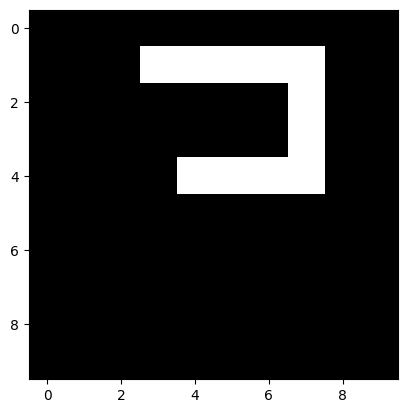

In [4]:
# 숫자 7의 label mask를 생성하려면, 먼저 숫자 7의 형태를 가진 2차원 배열을 생성해야 합니다.
# 다음은 간단한 예제 코드입니다.

import numpy as np
import matplotlib.pyplot as plt

# 먼저, 0으로 채워진 10x10 배열을 생성합니다.
mask = np.zeros((10, 10))

# 배열의 일부를 1로 설정하여 숫자 7의 형태를 만듭니다.
mask[1, 3:8] = 1  # 상단 수평선
mask[1:5, 7] = 1  # 오른쪽 수직선
mask[4, 4:8] = 1  # 중간 수평선

# 생성한 mask를 출력합니다.
plt.imshow(mask, cmap='gray')
plt.show()



In [6]:
mask = np.expand_dims(mask, axis=0)
mask = np.expand_dims(mask, axis=0)

In [7]:
mask.shape

(1, 1, 10, 10)

In [33]:
from transformers import SegformerForSemanticSegmentation


In [34]:
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b4-finetuned-ade-512-512")

In [36]:
model.save_pretrained('/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/segformer-b4-finetuned-ade-512-512')

In [31]:
from transformers import SegformerConfig

configuration = SegformerConfig.from_pretrained("nvidia/segformer-b4-finetuned-ade-512-512")

In [32]:
configuration

SegformerConfig {
  "architectures": [
    "SegformerForSemanticSegmentation"
  ],
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 768,
  "depths": [
    3,
    8,
    27,
    3
  ],
  "downsampling_rates": [
    1,
    4,
    8,
    16
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    64,
    128,
    320,
    512
  ],
  "id2label": {
    "0": "wall",
    "1": "building",
    "2": "sky",
    "3": "floor",
    "4": "tree",
    "5": "ceiling",
    "6": "road",
    "7": "bed ",
    "8": "windowpane",
    "9": "grass",
    "10": "cabinet",
    "11": "sidewalk",
    "12": "person",
    "13": "earth",
    "14": "door",
    "15": "table",
    "16": "mountain",
    "17": "plant",
    "18": "curtain",
    "19": "chair",
    "20": "car",
    "21": "water",
    "22": "painting",
    "23": "sofa",
    "24": "shelf",
    "25": "house",
    "26": "sea",
    "27": "mirror",
    "28": "rug",
  

In [30]:
configuration

SegformerConfig {
  "attention_probs_dropout_prob": 0.0,
  "classifier_dropout_prob": 0.1,
  "decoder_hidden_size": 256,
  "depths": [
    2,
    2,
    2,
    2
  ],
  "drop_path_rate": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    32,
    64,
    160,
    256
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-06,
  "mlp_ratios": [
    4,
    4,
    4,
    4
  ],
  "model_type": "segformer",
  "num_attention_heads": [
    1,
    2,
    5,
    8
  ],
  "num_channels": "nvidia/segformer-b4-finetuned-ade-512-512",
  "num_encoder_blocks": 4,
  "patch_sizes": [
    7,
    3,
    3,
    3
  ],
  "reshape_last_stage": true,
  "semantic_loss_ignore_index": 255,
  "sr_ratios": [
    8,
    4,
    2,
    1
  ],
  "strides": [
    4,
    2,
    2,
    2
  ],
  "transformers_version": "4.21.3"
}

In [10]:
points[2]

tensor([1, 1, 1, 1, 1, 2, 3, 4, 4, 4, 4])

In [14]:
points = torch.where(torch.tensor(mask) == 1)
y_min, y_max = torch.min(points[2]), torch.max(points[2])
x_min, x_max = torch.min(points[3]), torch.max(points[3])
t_seg = mask[:, :, y_min:y_max+1, x_min:x_max+1]

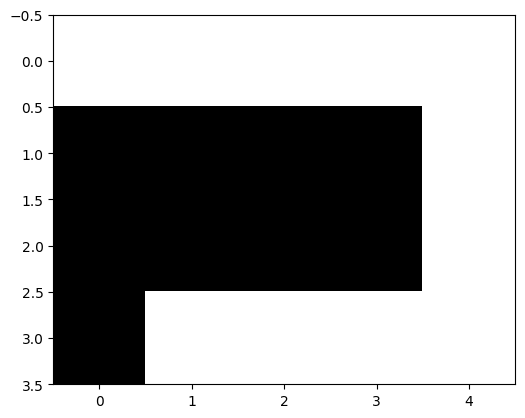

In [13]:
# 생성한 mask를 출력합니다.
plt.imshow(t_seg.squeeze(), cmap='gray')
plt.show()

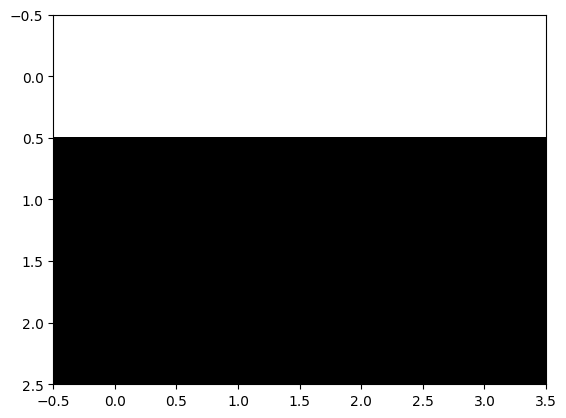

In [15]:
# 생성한 mask를 출력합니다.
plt.imshow(t_seg.squeeze(), cmap='gray')
plt.show()

In [3]:
import torch
torch.zeros(1, 1, 512, 512)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

In [64]:
import timm

encoder = timm.create_model('maxvit_xlarge_tf_512.in21k_ft_in1k', pretrained=False, features_only=True) # Xlarge
# encoder = timm.create_model('resnet50.a1_in1k', pretrained=False, features_only=True) # Xlarge
    # for mod in module.modules():
    #     if isinstance(mod, nn.Conv2d):
    #         mod.stride = (1, 1)
    #         mod.dilation = (dilation_rate, dilation_rate)
    #         kh, kw = mod.kernel_size
    #         mod.padding = ((kh // 2) * dilation_rate, (kh // 2) * dilation_rate)

In [65]:
def replace_strides_with_dilation(module, dilation_rate):
    """Patch Conv2d modules replacing strides with dilation"""
    for mod in module.modules():
        if isinstance(mod, nn.Conv2d):
            mod.stride = (1, 1)
            mod.dilation = (dilation_rate, dilation_rate)
            kh, kw = mod.kernel_size
            mod.padding = ((kh // 2) * dilation_rate, (kh // 2) * dilation_rate)

            # Kostyl for EfficientNet
            if hasattr(mod, "static_padding"):
                mod.static_padding = nn.Identity()

In [66]:
import torch.nn as nn
# replace_strides_with_dilation(encoder.stages_2, 2) 
replace_strides_with_dilation(encoder.stages_3, 2)


In [57]:
import torch.nn as nn
replace_strides_with_dilation(encoder.layer3, 2) 
replace_strides_with_dilation(encoder.layer4, 4) 


In [58]:
encoder.layer3

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), dilation=(2, 2), bias=False)
    (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2), bias=False)
    (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_block): Identity()
    (act2): ReLU(inplace=True)
    (aa): Identity()
    (conv3): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), dilation=(2, 2), bias=False)
    (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act3): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(512, 1024, kernel_size=(1, 1), stride=(1, 1), dilation=(2, 2), bias=False)
      (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (

In [60]:
#
encoder.layer3

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (drop_block): Identity()
    (act2): ReLU(inplace=True)
    (aa): Identity()
    (conv3): Conv2d(256, 1024, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act3): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(512, 1024, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1), bias=Fa

In [67]:
a = encoder(torch.ones(2, 3, 512, 512))

RuntimeError: The size of tensor a (32) must match the size of tensor b (16) at non-singleton dimension 3

In [80]:
encoder.stages_3

MaxxVitStage(
  (blocks): Sequential(
    (0): MaxxVitBlock(
      (conv): MbConvBlock(
        (shortcut): Downsample2d(
          (pool): AvgPool2dSame(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
          (expand): Conv2d(768, 1536, kernel_size=(1, 1), stride=(1, 1), dilation=(2, 2))
        )
        (pre_norm): BatchNormAct2d(
          768, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
        (down): Identity()
        (conv1_1x1): Conv2d(768, 6144, kernel_size=(1, 1), stride=(1, 1), dilation=(2, 2), bias=False)
        (norm1): BatchNormAct2d(
          6144, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): GELUTanh()
        )
        (conv2_kxk): Conv2dSame(6144, 6144, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2), groups=6144, bias=False)
        (norm2): BatchNormAct2d(
          6144, eps=0.001, momentum

In [44]:
a = encoder(torch.ones(2, 3, 512, 512))

In [41]:
for i in a:
    print(i.shape)

torch.Size([2, 64, 256, 256])
torch.Size([2, 256, 128, 128])
torch.Size([2, 512, 64, 64])
torch.Size([2, 1024, 64, 64])
torch.Size([2, 2048, 64, 64])


In [45]:
for i in a:
    print(i.shape)

torch.Size([2, 64, 256, 256])
torch.Size([2, 256, 128, 128])
torch.Size([2, 512, 64, 64])
torch.Size([2, 1024, 32, 32])
torch.Size([2, 2048, 16, 16])


In [83]:
import torch
a = torch.nn.Conv2d(3, 64, kernel_size=1, stride=1, padding=0, bias=True)
b = torch.nn.Conv2d(3, 64, kernel_size=1, stride=1, padding=0, bias=True)
c = torch.nn.Conv2d(3, 64, kernel_size=1, stride=1, padding=0, dilation=2, bias=True)
d = torch.nn.Conv2d(3, 64, kernel_size=1, stride=1, padding=0, dilation=2, bias=True)
e = torch.nn.Conv2d(3, 64, kernel_size=1, stride=1, padding=0, dilation=4, bias=True)


In [84]:
print(a(torch.ones(2, 3, 16, 16)).shape)
print(b(torch.ones(2, 3, 16, 16)).shape)
print(c(torch.ones(2, 3, 16, 16)).shape)
print(d(torch.ones(2, 3, 16, 16)).shape)
print(e(torch.ones(2, 3, 16, 16)).shape)

torch.Size([2, 64, 16, 16])
torch.Size([2, 64, 16, 16])
torch.Size([2, 64, 16, 16])
torch.Size([2, 64, 16, 16])
torch.Size([2, 64, 16, 16])


- ## 230725_Cell_MaxViT_UNet_MTL_Cross_Conv_CLAHE_Focal

###########################################################
Metric  =  train_loss
Argsort =  [496 497 485 476 478]
Value   =  [0.4427415 0.4431372 0.4452497 0.4461079 0.4461309]
###########################################################
Metric  =  valid_loss
Argsort =  [240  82 226 125 171]
Value   =  [0.8412331 0.8483229 0.8510017 0.8568306 0.8597481]
###########################################################
Metric  =  valid_dice_score
Argsort =  [184 139 271 274 355]
Value   =  [0.4197764 0.4191232 0.4179303 0.4164342 0.4154508]
###########################################################
Metric  =  valid_mF1
Argsort =  [ 82 271  49 125  98]
Value   =  [0.7145  0.7114  0.71055 0.7094  0.70915]
###########################################################
Metric  =  epoch
Argsort =  [499 498 497 496 495]
Value   =  [499 498 497 496 495]
###########################################################
Metric  =  lr
Argsort =  [47 34 24 25 26]
Value   =  [0.0001 0.0001 0.0001 0.0001 0.0001]


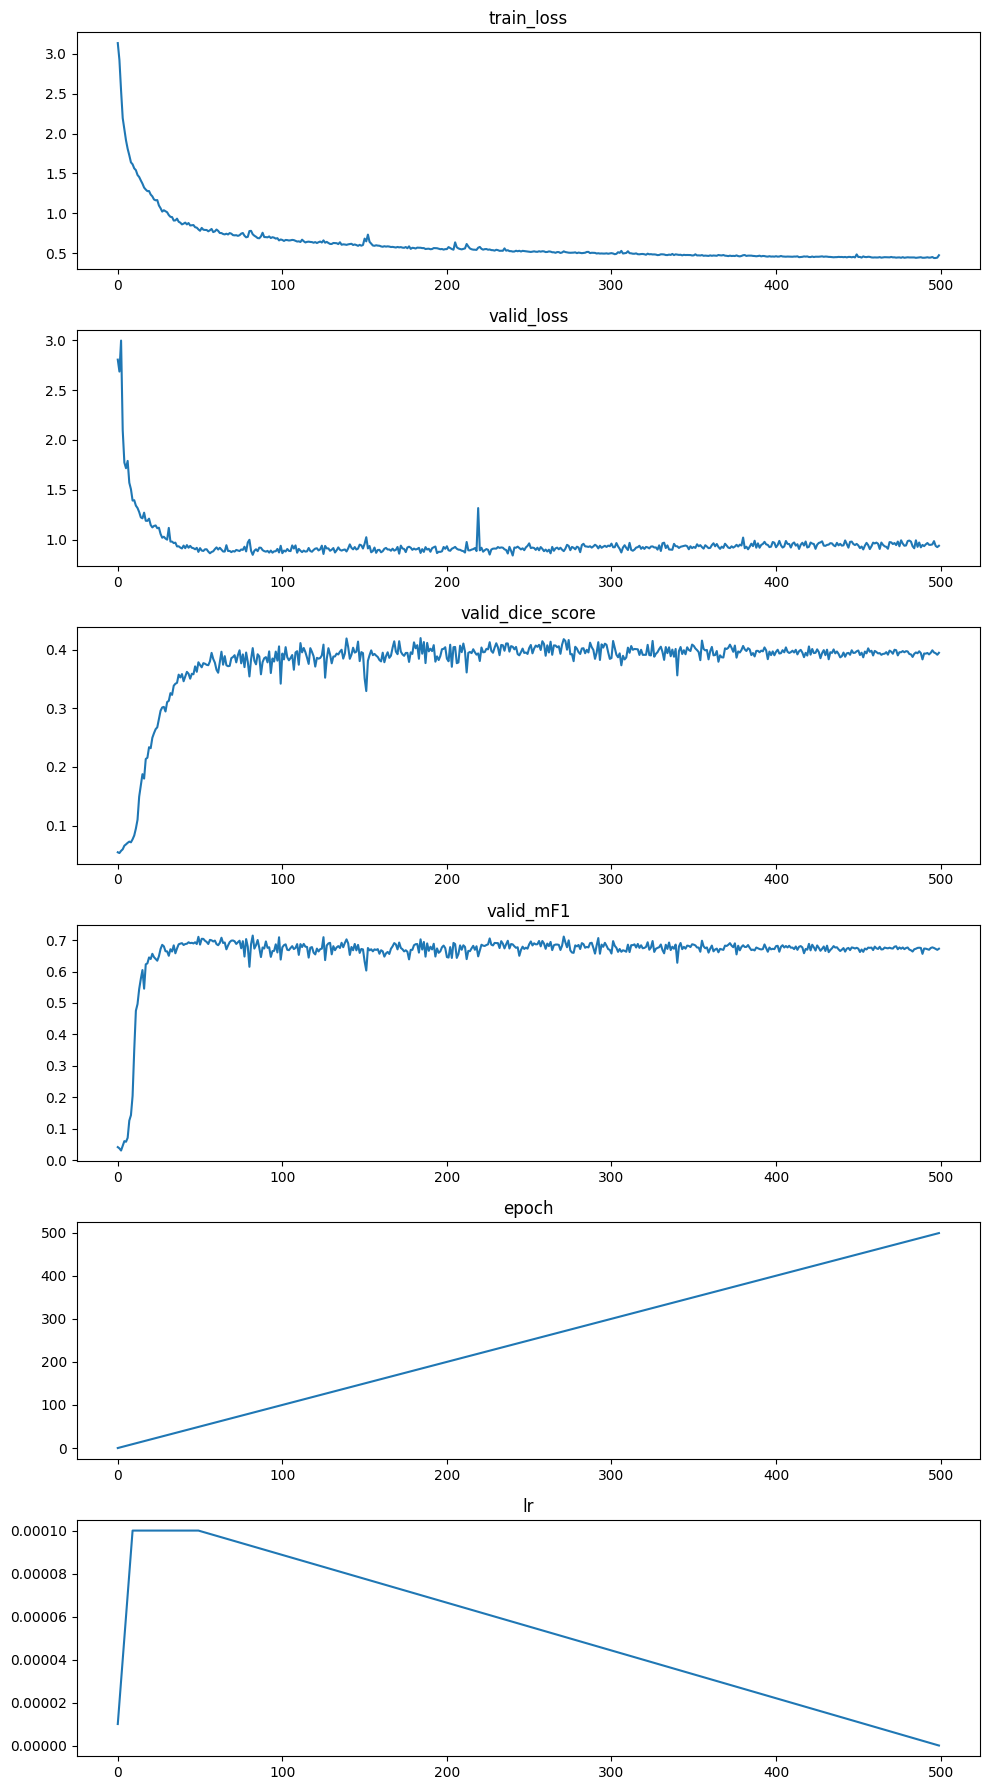

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt

def read_log(path):
    log_list = []
    lines = open(path, 'r').read().splitlines() 
    for line in lines:
        log_list.append(eval(line))
    return  log_list

# log 파일을 읽어옵니다.
log_list = read_log(path = '/workspace/sunggu/0.Challenge/MICCAI2023_OCELOT/checkpoints/230725_Cell_MaxViT_UNet_MTL_Cross_Conv_CLAHE_Focal/log.txt')

# 결과를 저장할 딕셔너리를 생성합니다.
result_dict = {}
for key in log_list[0].keys():
    result_dict[key] = [log[key] for log in log_list]

# 그래프를 생성합니다.
fig, axs = plt.subplots(len(result_dict.keys()), 1, figsize=(10, len(result_dict.keys())*3))

for idx, key in enumerate(result_dict.keys()):
    axs[idx].plot(result_dict[key])
    axs[idx].set_title(key)
    print("###########################################################")
    print("Metric  = ", key)
    
    if "loss" in key:
        print("Argsort = ", np.argsort(result_dict[key])[:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[:5]])
    else:
        print("Argsort = ", np.argsort(result_dict[key])[::-1][:5])
        print("Value   = ", np.array(result_dict[key])[np.argsort(result_dict[key])[::-1][:5]])

plt.tight_layout()
plt.show()


In [13]:
import torch.nn as nn
replace_strides_with_dilation(encoder.stages_2, 2)

In [14]:
import torch.nn as nn
replace_strides_with_dilation(encoder.stages_3, 4)

In [18]:
import torch
k = encoder(torch.ones(2, 3, 512, 512))

RuntimeError: The size of tensor a (64) must match the size of tensor b (32) at non-singleton dimension 3

In [ ]:
for i in